In [95]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing, metrics, ensemble, neighbors, linear_model, tree, model_selection
from sklearn.model_selection import KFold, StratifiedKFold

In [96]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [97]:
pd.set_option('max_columns', 50)

In [98]:
train['valid']=train['return']<0.1
train=train[train['valid']==True]
train=train.reset_index(drop=True)

In [99]:
import datetime
for i in range(len(train)):
    train['start_date'][i] = datetime.datetime.strptime(str(train['start_date'][i]), '%Y%m%d')
    train['sell_date'][i] = datetime.datetime.strptime(str(train['sell_date'][i]), '%Y%m%d')
    train['creation_date'][i] = datetime.datetime.strptime(str(train['creation_date'][i]), '%Y%m%d')

for i in range(len(test)):
    test['start_date'][i] = datetime.datetime.strptime(str(test['start_date'][i]), '%Y%m%d')
    test['sell_date'][i] = datetime.datetime.strptime(str(test['sell_date'][i]), '%Y%m%d')
    test['creation_date'][i] = datetime.datetime.strptime(str(test['creation_date'][i]), '%Y%m%d')

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/dj/anaco

In [100]:
train['creation_date_year']=train['creation_date'].dt.year
train['creation_date_week']=train['creation_date'].dt.week
train['creation_date_month']=train['creation_date'].dt.month
train['creation_date_dayofyear']=train['creation_date'].dt.dayofyear
train['creation_date_quarter']=train['creation_date'].dt.quarter
train['creation_date_weekofyear']=train['creation_date'].dt.weekofyear

test['creation_date_year']=test['creation_date'].dt.year
test['creation_date_week']=test['creation_date'].dt.week
test['creation_date_month']=test['creation_date'].dt.month
test['creation_date_dayofyear']=test['creation_date'].dt.dayofyear
test['creation_date_quarter']=test['creation_date'].dt.quarter
test['creation_date_weekofyear']=test['creation_date'].dt.weekofyear

train['start_date_year']=train['start_date'].dt.year
train['start_date_week']=train['start_date'].dt.week
train['start_date_month']=train['start_date'].dt.month
train['start_date_dayofyear']=train['start_date'].dt.dayofyear
train['start_date_quarter']=train['start_date'].dt.quarter
train['start_date_weekofyear']=train['start_date'].dt.weekofyear

test['start_date_year']=test['start_date'].dt.year
test['start_date_week']=test['start_date'].dt.week
test['start_date_month']=test['start_date'].dt.month
test['start_date_dayofyear']=test['start_date'].dt.dayofyear
test['start_date_quarter']=test['start_date'].dt.quarter
test['start_date_weekofyear']=test['start_date'].dt.weekofyear

In [101]:
train=train[train['pf_category']!='E']
train=train.reset_index(drop=True)

In [103]:
train['hedge_value'].fillna('Unknown', inplace=True)
test['hedge_value'].fillna('Unknown', inplace=True)

# missing values for numeric fields
train['sold'].fillna(train['sold'].median(), inplace=True)
train['bought'].fillna(train['bought'].median(), inplace=True)
test['sold'].fillna(test['sold'].median(), inplace=True)
test['bought'].fillna(test['bought'].median(), inplace=True)
train['libor_rate'].fillna(train['libor_rate'].median(), inplace=True)
test['libor_rate'].fillna(train['libor_rate'].median(), inplace=True)

train['profit']=train['sold']-train['bought']
test['profit']=test['sold']-test['bought']

train['indicator_code'].fillna(False, inplace=True)
test['indicator_code'].fillna(False, inplace=True)

train['status'].fillna(False, inplace=True)
test['status'].fillna(False, inplace=True)

train['rate_diff']=train['libor_rate']-train['euribor_rate']*100
test['rate_diff']=test['libor_rate']-test['euribor_rate']*100

In [116]:
train['id']=train['portfolio_id'].str[6:]
test['id']=test['portfolio_id'].str[6:]

In [223]:
train['valid']=train['return']<0.09
train=train[train['valid']==True]
train=train.reset_index(drop=True)

In [261]:
train['profit']=(train['profit']>1).astype(int)

In [262]:
test['profit']=(test['profit']>1).astype(int)

In [78]:
#train=train.sort_values(['creation_date'], ascending=[True])

In [7]:
print(train.country_code.value_counts())
print(train.currency.value_counts())

M    5307
T    2955
N     562
Z     481
U      61
Name: country_code, dtype: int64
CHF    5307
USD    2955
GBP     562
EUR     481
JPY      61
Name: currency, dtype: int64


In [11]:
pd.crosstab(train['pf_category'], train['office_id'])

office_id,OFF00001001,OFF00001002
pf_category,,
A,2424,0
B,1,1210
C,12,5248
D,469,0
E,2,0


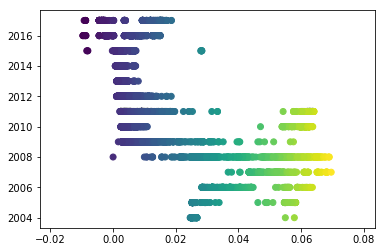

In [19]:
plt.scatter(train['return'], train['creation_date_year'], c=train['return'])

In [20]:
pd.crosstab(train['pf_category'], train['type'])

type,A,B,C,D,E,F,G,H
pf_category,,,,,,,,
A,2313,0,80,5,3,0,1,0
B,0,638,454,42,0,61,0,7
C,0,0,0,0,5248,0,0,0
D,0,0,0,0,467,0,0,0


In [281]:
train_X.columns

Index(['office_id', 'pf_category', 'euribor_rate', 'currency', 'libor_rate',
       'indicator_code', 'type', 'hedge_value', 'status', 'creation_date_year',
       'creation_date_month', 'creation_date_dayofyear',
       'creation_date_quarter', 'creation_date_weekofyear', 'profit',
       'rate_diff', 'id'],
      dtype='object')

In [ ]:
#train_X=train.drop(['portfolio_id', 'desk_id', 'start_date','country_code',])

In [22]:
def encoder(data):
    for col in data.columns:
        if data.dtypes[col] == "object":
            le = preprocessing.LabelEncoder()
            data[col]=le.fit_transform(data[col])
    return data


In [94]:
train_X['portfolio_id']=train['portfolio_id']

In [224]:
train_y=train["return"]

In [26]:
train['indicator_code']=train['indicator_code'].map({True:1, False:0})
test['indicator_code']=test['indicator_code'].map({True:1, False:0})

train['status']=train['status'].map({True:1, False:0})
test['status']=test['status'].map({True:1, False:0})

train['hedge_value']=train['hedge_value'].map({True:1, False:0, 'Unknown':2})
test['hedge_value']=test['hedge_value'].map({True:1, False:0, 'Unknown':2})

In [28]:
#train.isnull().sum()

In [120]:
test_id=test['portfolio_id']

In [282]:
train_X=train.drop(['portfolio_id', 'desk_id', 'start_date', 'sold', 'bought', 'creation_date', 'sell_date', 
                 'start_date_year', 'start_date_week', 'start_date_month', 'start_date_dayofyear', 
                 'start_date_quarter', 'start_date_weekofyear', 'creation_date_week', 'return', 'valid', 'id'], 1)
test_X=test.drop(['portfolio_id', 'desk_id', 'start_date', 'sold', 'bought', 'creation_date', 'sell_date', 
                 'start_date_year', 'start_date_week', 'start_date_month', 'start_date_dayofyear', 
                 'start_date_quarter', 'start_date_weekofyear', 'creation_date_week', 'id'], 1)

In [ ]:
(['office_id', 'pf_category', 'country_code', 'euribor_rate', 'currency',
       'libor_rate', 'indicator_code', 'status', 'profit', 'rate_diff',
       'period', 'creation_date_week', 'start_date_year', 'start_date_week',
       'start_date_month', 'currency_freq']

In [125]:
test_X.head()

,office_id,pf_category,sold,euribor_rate,currency,libor_rate,bought,indicator_code,type,hedge_value,status,creation_date_year,creation_date_month,creation_date_dayofyear,creation_date_quarter,creation_date_weekofyear,profit,rate_diff,id
0,OFF00001001,A,171831000.0,0.02074,USD,2.332216,1.715337e+08,0,A,2,0,2004,7,202,3,30,297325.036602,0.258216,1001
1,OFF00001002,B,56485000.0,0.02074,USD,2.332216,5.638038e+07,0,B,2,0,2004,7,205,3,30,104616.933025,0.258216,1004
2,OFF00001001,A,41734000.0,0.02074,USD,2.332216,4.166179e+07,0,A,2,0,2004,7,208,3,31,72213.762808,0.258216,1009
3,OFF00001001,A,82951000.0,0.02074,USD,2.332216,8.250936e+07,0,A,2,0,2004,7,208,3,31,441637.094767,0.258216,1013
4,OFF00001001,A,73293000.0,0.02074,USD,2.332216,7.317055e+07,0,A,2,0,2004,7,208,3,31,122453.957571,0.258216,1014


In [126]:
l=[]
for i in range(len(train)):
    l.append(((train.sell_date[i]-train.creation_date[i]).days))
train['period'] = pd.DataFrame(l)

l=[]    
for i in range(len(test)):
    l.append(((test.sell_date[i]-test.creation_date[i]).days))
test['period'] = pd.DataFrame(l)

In [16]:
l=[]
for i in range(len(train)):
    l.append(((train.sell_date[i]-train.start_date[i]).days))
train['period2'] = pd.DataFrame(l)

l=[]    
for i in range(len(test)):
    l.append(((test.sell_date[i]-test.start_date[i]).days))
test['period2'] = pd.DataFrame(l)

In [18]:
train_X=train.drop(['start_date', 'creation_date', 'sell_date'], 1)
test_X=test.drop(['start_date', 'creation_date', 'sell_date'], 1)

In [ ]:
te

In [31]:
# encode categorical fields
obj_cols = [x for x in all_data.columns if all_data[x].dtype == 'object']
encoder = LabelEncoder()
for x in obj_cols:
    encoder.fit(all_data[x])
    all_data[x] = encoder.transform(all_data[x])

In [52]:
test_X.isnull().sum()

office_id                   0
pf_category                 0
sold                        0
euribor_rate                0
currency                    0
libor_rate                  0
bought                      0
indicator_code              0
type                        0
hedge_value                 0
status                      0
creation_date_year          0
creation_date_month         0
creation_date_dayofyear     0
creation_date_quarter       0
creation_date_weekofyear    0
profit                      0
rate_diff                   0
dtype: int64

In [283]:
train_X=encoder(train_X)
test_X=encoder(test_X)

In [284]:
train_X.dtypes

office_id                     int64
pf_category                   int64
country_code                  int64
euribor_rate                float64
currency                      int64
libor_rate                  float64
indicator_code                int64
type                          int64
hedge_value                   int64
status                        int64
creation_date_year            int64
creation_date_month           int64
creation_date_dayofyear       int64
creation_date_quarter         int64
creation_date_weekofyear      int64
profit                        int64
rate_diff                   float64
period                        int64
dtype: object

In [75]:
train_X=train_X.reset_index(drop=True)
train_y=train_y.reset_index(drop=True)

In [285]:
train_X.head()

,office_id,pf_category,country_code,euribor_rate,currency,libor_rate,indicator_code,type,hedge_value,status,creation_date_year,creation_date_month,creation_date_dayofyear,creation_date_quarter,creation_date_weekofyear,profit,rate_diff,period
0,1,1,2,0.02074,4,2.332216,0,1,2,0,2004,7,202,3,30,1,0.258216,23
1,0,0,1,0.02074,2,5.269617,0,2,2,0,2004,7,205,3,30,1,3.195617,20
2,0,0,2,0.02074,4,2.332216,0,0,2,0,2004,7,205,3,30,1,0.258216,25
3,0,0,2,0.02074,4,2.332216,0,0,2,0,2004,7,205,3,30,1,0.258216,-10
4,1,1,2,0.02074,4,2.332216,0,1,2,0,2004,7,205,3,30,1,0.258216,-10


In [23]:
all_data = pd.concat((train_X.loc[:,'office_id':'start_date_month'],
                      test_X.loc[:,'office_id':'start_date_month']))

In [24]:
all_data.columns

Index(['office_id', 'pf_category', 'country_code', 'euribor_rate', 'currency',
       'libor_rate', 'indicator_code', 'type', 'hedge_value', 'status',
       'profit', 'rate_diff', 'period', 'period2', 'creation_date_year',
       'creation_date_week', 'creation_date_month', 'start_date_year',
       'start_date_week', 'start_date_month'],
      dtype='object')

In [25]:
enc=all_data.groupby('country_code').size()
enc=enc/len(all_data)
all_data['country_code_freq']=all_data.country_code.map(enc)

In [26]:
enc=all_data.groupby('currency').size()
enc=enc/len(all_data)
all_data['currency_freq']=all_data.currency.map(enc)

In [27]:
train_X=all_data[:len(train_X)]
test_X=all_data[len(train_X):]

In [36]:
train_X['desk_id']=train['desk_id']
test_X['desk_id']=test['desk_id']

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
train_X['desk_id'].fillna('None', inplace=True)
test_X['desk_id'].fillna('None', inplace=True)

/home/dj/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [38]:
encoder.fit(train_X['desk_id'])
train_X['desk_id'] = encoder.transform(train_X['desk_id'])

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
encoder.fit(test_X['desk_id'])
test_X['desk_id'] = encoder.transform(test_X['desk_id'])

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
test_X.columns

Index(['office_id', 'pf_category', 'country_code', 'euribor_rate', 'currency',
       'libor_rate', 'indicator_code', 'type', 'hedge_value', 'status',
       'profit', 'rate_diff', 'period', 'period2', 'creation_date_year',
       'creation_date_week', 'creation_date_month', 'start_date_year',
       'start_date_week', 'start_date_month', 'country_code_freq',
       'currency_freq', 'desk_id'],
      dtype='object')

In [40]:
# Explore Fare distribution 
g = sns.distplot(all_data["euribor_rate"], color="m", label="Skewness : %.2f"%(all_data["euribor_rate"].skew()))
g.legend(loc="best")

NameError: name 'all_data' is not defined

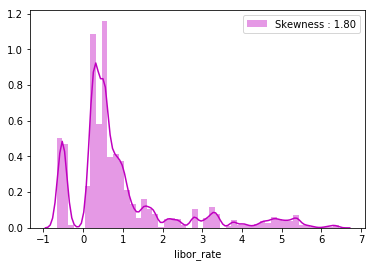

In [288]:
g = sns.distplot(all_data["libor_rate"], color="m", label="Skewness : %.2f"%(all_data["libor_rate"].skew()))
g.legend(loc="best")

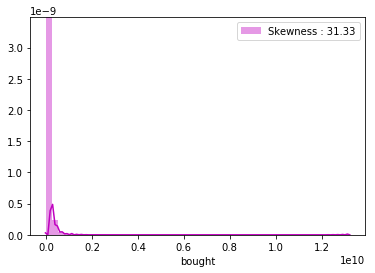

In [289]:
g = sns.distplot(all_data["bought"], color="m", label="Skewness : %.2f"%(all_data["bought"].skew()))
g.legend(loc="best")

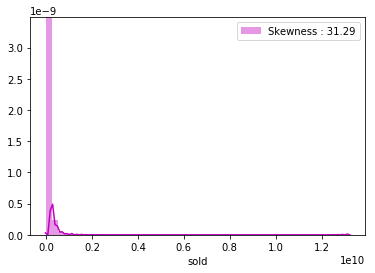

In [290]:
g = sns.distplot(all_data["sold"], color="m", label="Skewness : %.2f"%(all_data["sold"].skew()))
g.legend(loc="best")

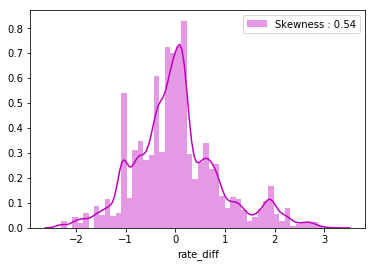

In [291]:
g = sns.distplot(all_data["rate_diff"], color="m", label="Skewness : %.2f"%(all_data["rate_diff"].skew()))
g.legend(loc="best")

In [292]:
all_data["euribor_rate"] = all_data["euribor_rate"].map(lambda i: np.log(i) if i > 0 else 0)
all_data["libor_rate"] = all_data["libor_rate"].map(lambda i: np.log(i) if i > 0 else 0)
all_data["sold"] = all_data["sold"].map(lambda i: np.log(i) if i > 0 else 0)
all_data["bought"] = all_data["bought"].map(lambda i: np.log(i) if i > 0 else 0)

In [294]:
all_data["office_id"] = all_data["office_id"].astype("category",categories=['OFF00001002','OFF00001001'],ordered=True).cat.codes
all_data["indicator_code"] = all_data["indicator_code"].astype("category",categories=['TRUE','None'],ordered=True).cat.codes
all_data["country_code"] = all_data["country_code"].astype("category",categories=["M","N","T","U","Z"],ordered=True).cat.codes
all_data["currency"] = all_data["currency"].astype("category",categories=["CHF","EUR","GBP","JPY","USD"],ordered=True).cat.codes
all_data["type"] = all_data["type"].astype("category",categories=["A","B","C","D","E","F","G","H"],ordered=True).cat.codes
all_data["hedge_value"] = all_data["hedge_value"].astype("category",categories=["FALSE","TRUE","None"],ordered=True).cat.codes
all_data["status"] = all_data["status"].astype("category",categories=["TRUE","None"],ordered=True).cat.codes
all_data["pf_category"] = all_data["pf_category"].astype("category",categories=["A","B","C","D","E"],ordered=True).cat.codes

In [295]:
all_data = pd.get_dummies(all_data,columns=['status','hedge_value','type','country_code','indicator_code','office_id'],
                          drop_first=True)

In [296]:
all_data.dtypes

In [29]:
all_data=encoder(all_data)

TypeError: 'LabelEncoder' object is not callable

In [188]:
train_y.shape

(9360,)

In [299]:
train_X['bought_greater_than_12'] = (train_X['bought'] > 12).astype(float)
train_X['sold_greater_than_12'] = (train_X['sold'] > 12).astype(float)
test_X['bought_greater_than_12'] = (test_X['bought'] > 12).astype(float)
test_X['sold_greater_than_12'] = (test_X['sold'] > 12).astype(float)

In [72]:
train_X.head()

,office_id,pf_category,country_code,euribor_rate,currency,libor_rate,indicator_code,status,profit,rate_diff,period,creation_date_week,start_date_year,start_date_week,start_date_month,currency_freq
0,1,1,2,0.02074,4,2.332216,0,0,1,0.258216,23,30,0,30,7,0.316016
1,0,0,1,0.02074,2,5.269617,0,0,1,3.195617,20,30,0,28,7,0.060069
2,0,0,2,0.02074,4,2.332216,0,0,1,0.258216,25,30,0,30,7,0.316016
3,0,0,2,0.02074,4,2.332216,0,0,1,0.258216,-10,30,0,24,6,0.316016
4,1,1,2,0.02074,4,2.332216,0,0,1,0.258216,-10,30,0,24,6,0.316016


In [69]:
train_X.start_date_year=train_X.start_date_year.map({2004:0, 2005:1, 2006:2, 2007:3, 2008:4, 2009:5, 2010:6, 2011:7, 
                                                    2012:8, 2013:9, 2014:10, 2015:11, 2016:12, 2017:13})
test_X.start_date_year=test_X.start_date_year.map({2004:0, 2005:1, 2006:2, 2007:3, 2008:4, 2009:5, 2010:6, 2011:7, 
                                                    2012:8, 2013:9, 2014:10, 2015:11, 2016:12, 2017:13})

/home/dj/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


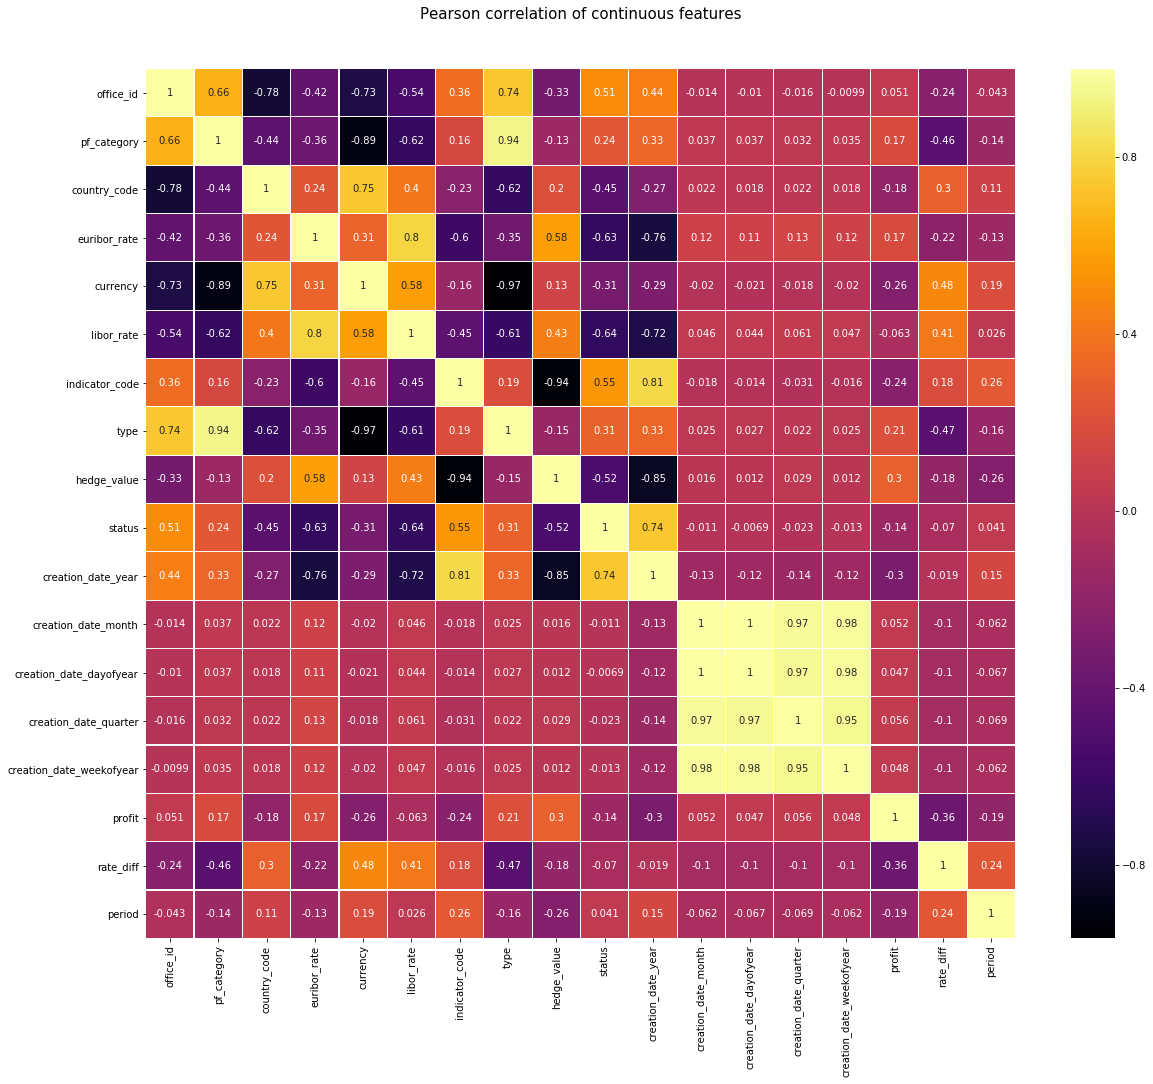

In [286]:
import seaborn as sns
from matplotlib import pyplot as plt
train_X_contin = train_X.select_dtypes(include=['int64', 'float64'])
colormap = plt.cm.inferno
plt.figure(figsize=(20,16))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_X_contin.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [77]:
train_X.drop(['libor_rate', 'euribor_rate'], 1, inplace=True)
test_X.drop(['libor_rate', 'euribor_rate'], 1, inplace=True)

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [266]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=7)
scores = cross_val_score(forest_reg, train_X, train_y, scoring='r2', cv=5)
print(scores)
print('mean r2:',np.mean(scores))

[-1.22308929  0.22760601  0.98155753  0.61012192  0.80325687]
mean r2: 0.279890607848


In [267]:
from IPython.display import FileLink

forest_reg = RandomForestRegressor(random_state=7)
forest_reg.fit(train_X, train_y)
preds = forest_reg.predict(test_X)

#sub = pd.DataFrame({'portfolio_id': sub_ids, 'return': preds})
#filename = 'sub8.csv'
#sub.to_csv(filename, index=False)
#FileLink(filename)  # lb 0.94277

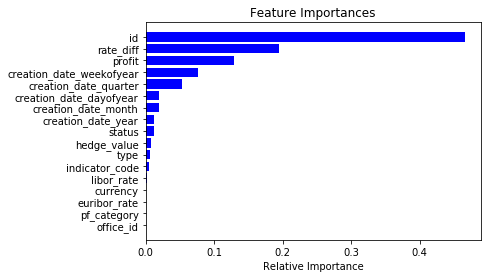

In [268]:
importances=(forest_reg.feature_importances_)
indices = np.argsort(importances)
features = train_X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

In [57]:
train_X['profit']=train_X['profit']>0

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
test_X['profit']=test_X['profit']>0

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
train_X['profit']=train_X['profit'].map({True:1, False:0})
test_X['profit']=test_X['profit'].map({True:1, False:0})

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(8, input_dim=1, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(train_X, train_y, epochs=150, batch_size=2, verbose=2)

ValueError: Error when checking input: expected dense_4_input to have shape (None, 1) but got array with shape (9366, 13)

In [55]:
import sys
import random
import operator
import xgboost as xgb
import lightgbm as lgb
from sklearn import preprocessing, metrics, ensemble, neighbors, linear_model, tree, model_selection
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit
from sklearn import manifold, decomposition
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

In [287]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i,feat))
    outfile.close()

def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, feature_names=None, seed_val=0, rounds=500, dep=8, eta=0.1):
    params = {}
    params["objective"] = "reg:linear"
    params['eval_metric'] = 'rmse'
    params["eta"] = eta
    params["subsample"] = 0.7
    params["min_child_weight"] = 10
    params["colsample_bytree"] = 0.7
    params["max_depth"] = dep

    params["silent"] = 1
    params["seed"] = seed_val
    #params["max_delta_step"] = 2
    #params["gamma"] = 0.5
    num_rounds = rounds

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    if feature_names is not None:
        create_feature_map(feature_names)
        model.dump_model('xgbmodel.txt', 'xgb.fmap', with_stats=True)
        importance = model.get_fscore(fmap='xgb.fmap')
        importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
        imp_df = pd.DataFrame(importance, columns=['feature','fscore'])
        imp_df['fscore'] = imp_df['fscore'] / imp_df['fscore'].sum()
        imp_df.to_csv("imp_feat.txt", index=False)

    pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
    pred_test_y2 = model.predict(xgb.DMatrix(test_X2), ntree_limit=model.best_ntree_limit)

    loss = 0
    if test_y is not None:
        loss = metrics.r2_score(test_y, pred_test_y)
        return pred_test_y, loss, pred_test_y2
    else:
        return pred_test_y, loss, pred_test_y2

def runLGB(train_X, train_y, test_X, test_y=None, test_X2=None, feature_names=None, seed_val=0, rounds=500, dep=10, eta=0.1):
    params = {}
    params["objective"] = "regression"
    
    params['metric'] = 'RMSE'
    params["max_depth"] = dep
    params["min_data_in_leaf"] = 128   
    params["learning_rate"] = eta
    params["bagging_fraction"] = 0.7
    params["feature_fraction"] = 0.5
    params["bagging_freq"] = 5
    params["bagging_seed"] = seed_val
    params["verbosity"] = 0
    num_rounds = rounds

    plst = list(params.items())
    lgtrain = lgb.Dataset(train_X, label=train_y)

    if test_y is not None:
        lgtest = lgb.Dataset(test_X, label=test_y)
        model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=50, verbose_eval=20)
    else:
        lgtest = lgb.DMatrix(test_X)
        model = lgb.train(params, lgtrain, num_rounds)

    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)

    loss = 0
    if test_y is not None:
        loss = metrics.r2_score(test_y, pred_test_y)
        print(loss)
        return pred_test_y, loss, pred_test_y2
    else:
        return pred_test_y, loss, pred_test_y2


In [288]:
if __name__ == "__main__":
    #model_name = "ET"
    for model_name in ["XGB1"]:

        print("Model building: "+model_name)
        kf = model_selection.KFold(n_splits=5, random_state=0, shuffle=True)
        cv_scores = []
        pred_test_full = 0
        
        pred_val_full = np.zeros(train_X.shape[0])
        for dev_index, val_index in kf.split(train_X):
            dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
            dev_y, val_y = train_y[dev_index], train_y[val_index]
           
            if model_name == "XGB1":
                pred_val, loss, pred_test = runXGB(dev_X, dev_y, val_X, val_y, test_X, rounds=5000, feature_names=dev_X.columns.tolist())
            elif model_name == "LGB1":
                pred_val, loss, pred_test = runLGB(dev_X, dev_y, val_X, val_y, test_X, rounds=5000)
            elif model_name == 'ET1':
                pred_val, loss, pred_test = runET(dev_X, dev_y, val_X, val_y, test_X)
            
            pred_val_full[val_index] = pred_val
            pred_test_full = pred_test_full + pred_test
            cv_scores.append(loss)
            print(cv_scores)
        pred_test_full /= 5.
        print(metrics.r2_score(train_y, pred_val_full))
        
        out_df = pd.DataFrame({"portfolio_id":test_id})
        out_df["return"] = pred_test_full
        out_df.to_csv("pred_test_v5_"+model_name+"11.csv", index=False)

#LGM 0.95961(0.25) 0.95924(0.05) 0.96117(0.1) 0.96105(0.2) 0.96091
#XGB 0.95937(0.25) 0.96301(0.05) 0.96186(0.01) 0.96117(0.1) 0.96162

Model building: XGB1
[0]	train-rmse:0.437801	test-rmse:0.437868
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
[20]	train-rmse:0.053537	test-rmse:0.053469
[40]	train-rmse:0.007111	test-rmse:0.007332
[60]	train-rmse:0.002407	test-rmse:0.003278
[80]	train-rmse:0.002002	test-rmse:0.003049
[100]	train-rmse:0.001838	test-rmse:0.002958
[120]	train-rmse:0.001709	test-rmse:0.002876
[140]	train-rmse:0.001606	test-rmse:0.002823
[160]	train-rmse:0.001529	test-rmse:0.002774
[180]	train-rmse:0.001458	test-rmse:0.002753
[200]	train-rmse:0.001403	test-rmse:0.002733
[220]	train-rmse:0.001346	test-rmse:0.002714
[240]	train-rmse:0.001287	test-rmse:0.0027
[260]	train-rmse:0.001249	test-rmse:0.002698
[280]	train-rmse:0.001208	test-rmse:0.002698
[300]	train-rmse:0.001182	test-rmse:0.002675
[320]	train-rmse:0.001157	test-rmse:0.002672
[340]	train-rmse:0.00113	test-rmse:0.002669
[360]	train-rmse:0.001103	test-rmse

In [681]:
f=[val_X1, val_X2, val_X3, val_X5]
a=pd.concat(f)
f=[val_Y1, val_Y2, val_Y3, val_Y5]
b=pd.concat(f)


In [58]:
train_X.columns

Index(['office_id', 'pf_category', 'sold', 'euribor_rate', 'currency',
       'libor_rate', 'bought', 'indicator_code', 'type', 'hedge_value',
       'status', 'creation_date_year', 'creation_date_month',
       'creation_date_dayofyear', 'creation_date_quarter',
       'creation_date_weekofyear', 'profit', 'rate_diff'],
      dtype='object')

In [637]:
train_X['sold']=train['sold']
test_X['bought']=test['bought']
train_X.drop(['currency_freq', 'country_code_freq'], 1, inplace=True)
test_X.drop(['currency_freq', 'country_code_freq'], 1, inplace=True)

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [645]:
test_X.columns

Index(['office_id', 'pf_category', 'country_code', 'euribor_rate', 'currency',
       'libor_rate', 'indicator_code', 'type', 'hedge_value', 'status',
       'rate_diff', 'profit', 'period', 'creation_date_year',
       'creation_date_week', 'creation_date_month'],
      dtype='object')

In [646]:
test_X['sold']=test['sold']
test_X['bought']=test['bought']

/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/dj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
from catboost import CatBoostRegressor

/home/dj/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.4 of module '_catboost' does not match runtime version 3.6
  return f(*args, **kwds)


In [85]:
def runCatB(train_X, train_y, test_X, test_y=None, test_X2=None, depth=6):
    model = CatBoostRegressor(
                                iterations = 5000,
                                learning_rate = 0.1,
                                depth = depth,
                                od_type='Iter',
                                od_wait=100,
                                rsm=0.7,
                                l2_leaf_reg=3,
                                eval_metric = 'RMSE', 
                                verbose=True,
                                random_seed=42)
    
    model.fit(train_X, train_y, eval_set=(test_X, test_y))#, plot=True)
    train_preds = model.predict(train_X)
    test_preds = model.predict(test_X)
    test_preds2 = model.predict(test_X2)
    test_loss = 0
    if test_y is not None:
        train_loss = metrics.r2_score(train_y, train_preds)
        test_loss = metrics.r2_score(test_y, test_preds)
        print("Depth : ", depth)
        print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, test_preds2


In [92]:
kf = model_selection.TimeSeriesSplit(n_splits=5)#, shuffle=True, random_state=2018)
cv_scores = []
pred_test_full = 0
pred_val_full = np.zeros(train_X.shape[0])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]

        
    pred_val, loss, pred_test = runCatB(dev_X, dev_y, val_X, val_y, test_X)
            
    pred_val_full[val_index] = pred_val
    pred_test_full = pred_test_full + pred_test
    cv_scores.append(loss)
    print(cv_scores)
pred_test_full /= 5.
print(metrics.r2_score(train_y, pred_val_full))

/home/dj/anaconda3/lib/python3.6/site-packages/catboost/core.py:1529: FutureWarning: The 'verbose' parameter is deprecated, use 'logging_level' parameter instead (posible values: 'Silent', 'Verbose', 'Info', 'Debug').
  super(CatBoostRegressor, self).__init__(params)


0: learn: 0.03821396	test: 0.01972962	bestTest: 0.01972962 (0)	total: 157ms	remaining: 13m 3s
1: learn: 0.03481716	test: 0.01855618	bestTest: 0.01855618 (1)	total: 256ms	remaining: 10m 38s
2: learn: 0.03166051	test: 0.01799347	bestTest: 0.01799347 (2)	total: 345ms	remaining: 9m 33s
3: learn: 0.02887279	test: 0.01794077	bestTest: 0.01794077 (3)	total: 455ms	remaining: 9m 27s
4: learn: 0.02649083	test: 0.01758404	bestTest: 0.01758404 (4)	total: 544ms	remaining: 9m 3s
5: learn: 0.02427867	test: 0.01752646	bestTest: 0.01752646 (5)	total: 655ms	remaining: 9m 4s
6: learn: 0.0221989	test: 0.01749177	bestTest: 0.01749177 (6)	total: 755ms	remaining: 8m 58s
7: learn: 0.02032804	test: 0.01742011	bestTest: 0.01742011 (7)	total: 865ms	remaining: 8m 59s
8: learn: 0.01865491	test: 0.01734443	bestTest: 0.01734443 (8)	total: 975ms	remaining: 9m
9: learn: 0.0170747	test: 0.01722663	bestTest: 0.01722663 (9)	total: 1.06s	remaining: 8m 50s
10: learn: 0.01579952	test: 0.01716246	bestTest: 0.01716246 (10)	to

168: learn: 0.003188617	test: 0.01481119	bestTest: 0.01479452 (158)	total: 17.1s	remaining: 8m 9s
169: learn: 0.003183702	test: 0.01482245	bestTest: 0.01479452 (158)	total: 17.2s	remaining: 8m 9s
170: learn: 0.003183696	test: 0.01482261	bestTest: 0.01479452 (158)	total: 17.3s	remaining: 8m 9s
171: learn: 0.00317364	test: 0.0148216	bestTest: 0.01479452 (158)	total: 17.4s	remaining: 8m 9s
172: learn: 0.003156245	test: 0.01481681	bestTest: 0.01479452 (158)	total: 17.5s	remaining: 8m 8s
173: learn: 0.003155776	test: 0.01481677	bestTest: 0.01479452 (158)	total: 17.6s	remaining: 8m 8s
174: learn: 0.003133577	test: 0.01481712	bestTest: 0.01479452 (158)	total: 17.7s	remaining: 8m 8s
175: learn: 0.003114307	test: 0.01481892	bestTest: 0.01479452 (158)	total: 17.8s	remaining: 8m 8s
176: learn: 0.00309941	test: 0.0148217	bestTest: 0.01479452 (158)	total: 17.9s	remaining: 8m 8s
177: learn: 0.003093565	test: 0.01481719	bestTest: 0.01479452 (158)	total: 18s	remaining: 8m 7s
178: learn: 0.003090546	te

252: learn: 0.002792645	test: 0.01481101	bestTest: 0.01478917 (216)	total: 25.8s	remaining: 8m 5s
253: learn: 0.002792608	test: 0.01481093	bestTest: 0.01478917 (216)	total: 25.9s	remaining: 8m 4s
254: learn: 0.002792448	test: 0.01481256	bestTest: 0.01478917 (216)	total: 26.1s	remaining: 8m 4s
255: learn: 0.00279244	test: 0.01481233	bestTest: 0.01478917 (216)	total: 26.2s	remaining: 8m 4s
256: learn: 0.002791327	test: 0.01481086	bestTest: 0.01478917 (216)	total: 26.2s	remaining: 8m 4s
257: learn: 0.002785824	test: 0.01480826	bestTest: 0.01478917 (216)	total: 26.3s	remaining: 8m 4s
258: learn: 0.002785206	test: 0.0147987	bestTest: 0.01478917 (216)	total: 26.4s	remaining: 8m 3s
259: learn: 0.002775102	test: 0.01479923	bestTest: 0.01478917 (216)	total: 26.5s	remaining: 8m 3s
260: learn: 0.002773135	test: 0.01479975	bestTest: 0.01478917 (216)	total: 26.8s	remaining: 8m 6s
261: learn: 0.002772212	test: 0.01479697	bestTest: 0.01478917 (216)	total: 26.9s	remaining: 8m 6s
262: learn: 0.00276804

336: learn: 0.00251561	test: 0.01480558	bestTest: 0.01475142 (293)	total: 36s	remaining: 8m 18s
337: learn: 0.002515606	test: 0.01480558	bestTest: 0.01475142 (293)	total: 36.1s	remaining: 8m 18s
338: learn: 0.002515605	test: 0.01480557	bestTest: 0.01475142 (293)	total: 36.4s	remaining: 8m 20s
339: learn: 0.002512586	test: 0.01480497	bestTest: 0.01475142 (293)	total: 36.5s	remaining: 8m 20s
340: learn: 0.002509277	test: 0.01480543	bestTest: 0.01475142 (293)	total: 36.8s	remaining: 8m 23s
341: learn: 0.002507957	test: 0.0148012	bestTest: 0.01475142 (293)	total: 37.6s	remaining: 8m 32s
342: learn: 0.002501573	test: 0.01479642	bestTest: 0.01475142 (293)	total: 37.7s	remaining: 8m 32s
343: learn: 0.002501469	test: 0.0147948	bestTest: 0.01475142 (293)	total: 37.9s	remaining: 8m 33s
344: learn: 0.002497963	test: 0.01479361	bestTest: 0.01475142 (293)	total: 38s	remaining: 8m 32s
345: learn: 0.002497266	test: 0.01479516	bestTest: 0.01475142 (293)	total: 38.1s	remaining: 8m 32s
346: learn: 0.002

23: learn: 0.005721895	test: 0.007470751	bestTest: 0.007470751 (23)	total: 2.92s	remaining: 10m 5s
24: learn: 0.005504007	test: 0.007251043	bestTest: 0.007251043 (24)	total: 3s	remaining: 9m 56s
25: learn: 0.005315561	test: 0.007055487	bestTest: 0.007055487 (25)	total: 3.1s	remaining: 9m 52s
26: learn: 0.005168297	test: 0.006895587	bestTest: 0.006895587 (26)	total: 3.17s	remaining: 9m 44s
27: learn: 0.004991459	test: 0.006706655	bestTest: 0.006706655 (27)	total: 3.26s	remaining: 9m 39s
28: learn: 0.004899232	test: 0.006583295	bestTest: 0.006583295 (28)	total: 3.35s	remaining: 9m 34s
29: learn: 0.004775653	test: 0.006455822	bestTest: 0.006455822 (29)	total: 3.45s	remaining: 9m 31s
30: learn: 0.004670811	test: 0.006383075	bestTest: 0.006383075 (30)	total: 3.56s	remaining: 9m 30s
31: learn: 0.00454775	test: 0.006331393	bestTest: 0.006331393 (31)	total: 3.67s	remaining: 9m 30s
32: learn: 0.004467722	test: 0.006249976	bestTest: 0.006249976 (32)	total: 3.78s	remaining: 9m 29s
33: learn: 0.00

187: learn: 0.002859773	test: 0.005032856	bestTest: 0.005027402 (174)	total: 25.2s	remaining: 10m 45s
188: learn: 0.002859377	test: 0.005035369	bestTest: 0.005027402 (174)	total: 25.3s	remaining: 10m 44s
189: learn: 0.002850532	test: 0.005023347	bestTest: 0.005023347 (189)	total: 25.4s	remaining: 10m 43s
190: learn: 0.002850532	test: 0.00502328	bestTest: 0.00502328 (190)	total: 25.5s	remaining: 10m 42s
191: learn: 0.002850527	test: 0.00502284	bestTest: 0.00502284 (191)	total: 25.6s	remaining: 10m 41s
192: learn: 0.002850527	test: 0.005022786	bestTest: 0.005022786 (192)	total: 25.7s	remaining: 10m 40s
193: learn: 0.002846147	test: 0.005020427	bestTest: 0.005020427 (193)	total: 25.8s	remaining: 10m 39s
194: learn: 0.002842531	test: 0.005020802	bestTest: 0.005020427 (193)	total: 25.9s	remaining: 10m 38s
195: learn: 0.00284202	test: 0.00502198	bestTest: 0.005020427 (193)	total: 26s	remaining: 10m 37s
196: learn: 0.002839464	test: 0.005020037	bestTest: 0.005020037 (196)	total: 26.1s	remaini

269: learn: 0.002687192	test: 0.005008369	bestTest: 0.005008369 (269)	total: 33.9s	remaining: 9m 53s
270: learn: 0.002681688	test: 0.005003223	bestTest: 0.005003223 (270)	total: 34.1s	remaining: 9m 55s
271: learn: 0.002677556	test: 0.005019784	bestTest: 0.005003223 (270)	total: 34.2s	remaining: 9m 55s
272: learn: 0.002669225	test: 0.005018117	bestTest: 0.005003223 (270)	total: 34.3s	remaining: 9m 54s
273: learn: 0.002667794	test: 0.005024769	bestTest: 0.005003223 (270)	total: 34.5s	remaining: 9m 54s
274: learn: 0.00266716	test: 0.005025694	bestTest: 0.005003223 (270)	total: 34.6s	remaining: 9m 53s
275: learn: 0.002664084	test: 0.005025744	bestTest: 0.005003223 (270)	total: 34.7s	remaining: 9m 53s
276: learn: 0.002664082	test: 0.005025574	bestTest: 0.005003223 (270)	total: 34.7s	remaining: 9m 52s
277: learn: 0.002664082	test: 0.005025549	bestTest: 0.005003223 (270)	total: 34.8s	remaining: 9m 50s
278: learn: 0.002662815	test: 0.005015188	bestTest: 0.005003223 (270)	total: 34.9s	remaining

351: learn: 0.002551379	test: 0.005045293	bestTest: 0.005003223 (270)	total: 45.1s	remaining: 9m 55s
352: learn: 0.00255137	test: 0.005045389	bestTest: 0.005003223 (270)	total: 45.4s	remaining: 9m 57s
353: learn: 0.002550498	test: 0.005045985	bestTest: 0.005003223 (270)	total: 45.5s	remaining: 9m 57s
354: learn: 0.002548202	test: 0.00504623	bestTest: 0.005003223 (270)	total: 45.7s	remaining: 9m 58s
355: learn: 0.002548172	test: 0.005046135	bestTest: 0.005003223 (270)	total: 46s	remaining: 10m
356: learn: 0.002545295	test: 0.005047464	bestTest: 0.005003223 (270)	total: 46.1s	remaining: 9m 59s
357: learn: 0.002542773	test: 0.005045904	bestTest: 0.005003223 (270)	total: 46.4s	remaining: 10m 1s
358: learn: 0.002535645	test: 0.005046059	bestTest: 0.005003223 (270)	total: 46.6s	remaining: 10m 3s
359: learn: 0.002535643	test: 0.005046044	bestTest: 0.005003223 (270)	total: 46.7s	remaining: 10m 2s
360: learn: 0.002534506	test: 0.005045843	bestTest: 0.005003223 (270)	total: 47s	remaining: 10m 3s

60: learn: 0.003262849	test: 0.002187752	bestTest: 0.002004827 (14)	total: 7.5s	remaining: 10m 6s
61: learn: 0.003251582	test: 0.002194296	bestTest: 0.002004827 (14)	total: 7.6s	remaining: 10m 4s
62: learn: 0.003235396	test: 0.002193462	bestTest: 0.002004827 (14)	total: 7.71s	remaining: 10m 4s
63: learn: 0.003227551	test: 0.002179536	bestTest: 0.002004827 (14)	total: 7.82s	remaining: 10m 3s
64: learn: 0.003220222	test: 0.002183819	bestTest: 0.002004827 (14)	total: 7.93s	remaining: 10m 2s
65: learn: 0.003202069	test: 0.002191682	bestTest: 0.002004827 (14)	total: 8.22s	remaining: 10m 14s
66: learn: 0.003194069	test: 0.002193209	bestTest: 0.002004827 (14)	total: 8.34s	remaining: 10m 14s
67: learn: 0.003189805	test: 0.002194892	bestTest: 0.002004827 (14)	total: 8.45s	remaining: 10m 12s
68: learn: 0.003184193	test: 0.002192597	bestTest: 0.002004827 (14)	total: 8.54s	remaining: 10m 10s
69: learn: 0.003179358	test: 0.002183509	bestTest: 0.002004827 (14)	total: 8.65s	remaining: 10m 9s
70: lear

26: learn: 0.004089336	test: 0.003872437	bestTest: 0.003872437 (26)	total: 3.49s	remaining: 10m 42s
27: learn: 0.003983623	test: 0.003863197	bestTest: 0.003863197 (27)	total: 3.61s	remaining: 10m 41s
28: learn: 0.003894537	test: 0.003851567	bestTest: 0.003851567 (28)	total: 3.73s	remaining: 10m 39s
29: learn: 0.003792213	test: 0.003842983	bestTest: 0.003842983 (29)	total: 3.84s	remaining: 10m 36s
30: learn: 0.003696422	test: 0.003830969	bestTest: 0.003830969 (30)	total: 3.96s	remaining: 10m 35s
31: learn: 0.003610421	test: 0.003822829	bestTest: 0.003822829 (31)	total: 4.11s	remaining: 10m 37s
32: learn: 0.003564151	test: 0.003810131	bestTest: 0.003810131 (32)	total: 4.38s	remaining: 10m 59s
33: learn: 0.003507915	test: 0.003810479	bestTest: 0.003810131 (32)	total: 4.49s	remaining: 10m 56s
34: learn: 0.00343868	test: 0.003784965	bestTest: 0.003784965 (34)	total: 4.59s	remaining: 10m 51s
35: learn: 0.003374581	test: 0.003767626	bestTest: 0.003767626 (35)	total: 4.69s	remaining: 10m 47s
3

109: learn: 0.002451102	test: 0.003538655	bestTest: 0.003537419 (108)	total: 16.9s	remaining: 12m 29s
110: learn: 0.002445327	test: 0.003538453	bestTest: 0.003537419 (108)	total: 17s	remaining: 12m 27s
111: learn: 0.002444208	test: 0.003540067	bestTest: 0.003537419 (108)	total: 17.3s	remaining: 12m 33s
112: learn: 0.002439603	test: 0.003539708	bestTest: 0.003537419 (108)	total: 17.6s	remaining: 12m 39s
113: learn: 0.002436318	test: 0.003540086	bestTest: 0.003537419 (108)	total: 17.8s	remaining: 12m 43s
114: learn: 0.002426241	test: 0.003544808	bestTest: 0.003537419 (108)	total: 17.9s	remaining: 12m 42s
115: learn: 0.002419002	test: 0.003543439	bestTest: 0.003537419 (108)	total: 18.2s	remaining: 12m 46s
116: learn: 0.002418895	test: 0.003543202	bestTest: 0.003537419 (108)	total: 18.4s	remaining: 12m 48s
117: learn: 0.002411206	test: 0.003543369	bestTest: 0.003537419 (108)	total: 18.5s	remaining: 12m 46s
118: learn: 0.002407703	test: 0.003535472	bestTest: 0.003535472 (118)	total: 18.6s	r

191: learn: 0.002187155	test: 0.003441921	bestTest: 0.003437411 (186)	total: 28.1s	remaining: 11m 44s
192: learn: 0.002182301	test: 0.003436797	bestTest: 0.003436797 (192)	total: 28.3s	remaining: 11m 43s
193: learn: 0.002179351	test: 0.003438603	bestTest: 0.003436797 (192)	total: 28.4s	remaining: 11m 43s
194: learn: 0.002174173	test: 0.003426377	bestTest: 0.003426377 (194)	total: 28.7s	remaining: 11m 46s
195: learn: 0.002172751	test: 0.003426097	bestTest: 0.003426097 (195)	total: 28.8s	remaining: 11m 45s
196: learn: 0.002172751	test: 0.003426084	bestTest: 0.003426084 (196)	total: 28.9s	remaining: 11m 44s
197: learn: 0.002172267	test: 0.003426218	bestTest: 0.003426084 (196)	total: 29s	remaining: 11m 43s
198: learn: 0.002172267	test: 0.003426207	bestTest: 0.003426084 (196)	total: 29.1s	remaining: 11m 41s
199: learn: 0.002168325	test: 0.003413808	bestTest: 0.003413808 (199)	total: 29.2s	remaining: 11m 41s
200: learn: 0.002165863	test: 0.00341422	bestTest: 0.003413808 (199)	total: 29.3s	re

272: learn: 0.00202394	test: 0.003303856	bestTest: 0.003303856 (272)	total: 39.2s	remaining: 11m 18s
273: learn: 0.002021584	test: 0.003303252	bestTest: 0.003303252 (273)	total: 39.5s	remaining: 11m 20s
274: learn: 0.002019353	test: 0.00330262	bestTest: 0.00330262 (274)	total: 39.6s	remaining: 11m 19s
275: learn: 0.00201832	test: 0.00330131	bestTest: 0.00330131 (275)	total: 39.8s	remaining: 11m 21s
276: learn: 0.00201665	test: 0.003301264	bestTest: 0.003301264 (276)	total: 40s	remaining: 11m 21s
277: learn: 0.0020166	test: 0.003300768	bestTest: 0.003300768 (277)	total: 40.2s	remaining: 11m 23s
278: learn: 0.002015058	test: 0.003294592	bestTest: 0.003294592 (278)	total: 40.3s	remaining: 11m 22s
279: learn: 0.002014212	test: 0.00328517	bestTest: 0.00328517 (279)	total: 40.6s	remaining: 11m 24s
280: learn: 0.00201289	test: 0.003284755	bestTest: 0.003284755 (280)	total: 40.9s	remaining: 11m 27s
281: learn: 0.002012182	test: 0.003286632	bestTest: 0.003284755 (280)	total: 41s	remaining: 11m 

353: learn: 0.001926394	test: 0.003248781	bestTest: 0.003248781 (353)	total: 50.2s	remaining: 10m 58s
354: learn: 0.001925627	test: 0.00324868	bestTest: 0.00324868 (354)	total: 50.3s	remaining: 10m 58s
355: learn: 0.001922851	test: 0.003250142	bestTest: 0.00324868 (354)	total: 50.4s	remaining: 10m 57s
356: learn: 0.001921419	test: 0.003250256	bestTest: 0.00324868 (354)	total: 50.5s	remaining: 10m 57s
357: learn: 0.001918229	test: 0.00324884	bestTest: 0.00324868 (354)	total: 50.7s	remaining: 10m 56s
358: learn: 0.001916149	test: 0.003251529	bestTest: 0.00324868 (354)	total: 50.8s	remaining: 10m 56s
359: learn: 0.00191478	test: 0.003251086	bestTest: 0.00324868 (354)	total: 50.9s	remaining: 10m 55s
360: learn: 0.00191441	test: 0.003249317	bestTest: 0.00324868 (354)	total: 51s	remaining: 10m 55s
361: learn: 0.001913476	test: 0.003249451	bestTest: 0.00324868 (354)	total: 51.1s	remaining: 10m 54s
362: learn: 0.001913312	test: 0.003249392	bestTest: 0.00324868 (354)	total: 51.2s	remaining: 10m

434: learn: 0.001825569	test: 0.00322642	bestTest: 0.003210181 (402)	total: 1m	remaining: 10m 31s
435: learn: 0.001825372	test: 0.00322407	bestTest: 0.003210181 (402)	total: 1m	remaining: 10m 32s
436: learn: 0.001824542	test: 0.003220429	bestTest: 0.003210181 (402)	total: 1m	remaining: 10m 31s
437: learn: 0.001824298	test: 0.003221215	bestTest: 0.003210181 (402)	total: 1m	remaining: 10m 31s
438: learn: 0.001823643	test: 0.003221779	bestTest: 0.003210181 (402)	total: 1m	remaining: 10m 30s
439: learn: 0.001823243	test: 0.003221573	bestTest: 0.003210181 (402)	total: 1m	remaining: 10m 29s
440: learn: 0.00182312	test: 0.003217729	bestTest: 0.003210181 (402)	total: 1m	remaining: 10m 29s
441: learn: 0.001822819	test: 0.003217807	bestTest: 0.003210181 (402)	total: 1m	remaining: 10m 28s
442: learn: 0.001822594	test: 0.003218017	bestTest: 0.003210181 (402)	total: 1m 1s	remaining: 10m 28s
443: learn: 0.00182221	test: 0.003217312	bestTest: 0.003210181 (402)	total: 1m 1s	remaining: 10m 28s
444: lea

516: learn: 0.001763739	test: 0.003184053	bestTest: 0.003183387 (510)	total: 1m 15s	remaining: 10m 51s
517: learn: 0.001763369	test: 0.003185445	bestTest: 0.003183387 (510)	total: 1m 15s	remaining: 10m 51s
518: learn: 0.001762836	test: 0.003185083	bestTest: 0.003183387 (510)	total: 1m 15s	remaining: 10m 50s
519: learn: 0.001762378	test: 0.003185694	bestTest: 0.003183387 (510)	total: 1m 15s	remaining: 10m 50s
520: learn: 0.001762375	test: 0.003185721	bestTest: 0.003183387 (510)	total: 1m 15s	remaining: 10m 49s
521: learn: 0.001760822	test: 0.003185589	bestTest: 0.003183387 (510)	total: 1m 15s	remaining: 10m 49s
522: learn: 0.001760803	test: 0.003185543	bestTest: 0.003183387 (510)	total: 1m 15s	remaining: 10m 48s
523: learn: 0.001760033	test: 0.003186145	bestTest: 0.003183387 (510)	total: 1m 16s	remaining: 10m 49s
524: learn: 0.001759322	test: 0.003185905	bestTest: 0.003183387 (510)	total: 1m 16s	remaining: 10m 49s
525: learn: 0.001758188	test: 0.003185326	bestTest: 0.003183387 (510)	tot

596: learn: 0.001713363	test: 0.003164328	bestTest: 0.003163965 (595)	total: 1m 25s	remaining: 10m 29s
597: learn: 0.001712517	test: 0.003165027	bestTest: 0.003163965 (595)	total: 1m 25s	remaining: 10m 29s
598: learn: 0.001712432	test: 0.003165149	bestTest: 0.003163965 (595)	total: 1m 25s	remaining: 10m 29s
599: learn: 0.001712327	test: 0.003163903	bestTest: 0.003163903 (599)	total: 1m 25s	remaining: 10m 28s
600: learn: 0.001711841	test: 0.003162086	bestTest: 0.003162086 (600)	total: 1m 25s	remaining: 10m 28s
601: learn: 0.001711531	test: 0.00315993	bestTest: 0.00315993 (601)	total: 1m 26s	remaining: 10m 29s
602: learn: 0.00171153	test: 0.003159883	bestTest: 0.003159883 (602)	total: 1m 26s	remaining: 10m 28s
603: learn: 0.001710924	test: 0.003160326	bestTest: 0.003159883 (602)	total: 1m 26s	remaining: 10m 29s
604: learn: 0.001709943	test: 0.003162464	bestTest: 0.003159883 (602)	total: 1m 26s	remaining: 10m 29s
605: learn: 0.001708103	test: 0.003162474	bestTest: 0.003159883 (602)	total:

676: learn: 0.001662671	test: 0.003136043	bestTest: 0.003135824 (674)	total: 1m 35s	remaining: 10m 12s
677: learn: 0.001662614	test: 0.003136089	bestTest: 0.003135824 (674)	total: 1m 36s	remaining: 10m 12s
678: learn: 0.001662509	test: 0.003135458	bestTest: 0.003135458 (678)	total: 1m 36s	remaining: 10m 11s
679: learn: 0.001662071	test: 0.003135563	bestTest: 0.003135458 (678)	total: 1m 36s	remaining: 10m 11s
680: learn: 0.001661908	test: 0.003135446	bestTest: 0.003135446 (680)	total: 1m 36s	remaining: 10m 10s
681: learn: 0.00166181	test: 0.003135533	bestTest: 0.003135446 (680)	total: 1m 36s	remaining: 10m 10s
682: learn: 0.001661659	test: 0.003135586	bestTest: 0.003135446 (680)	total: 1m 36s	remaining: 10m 10s
683: learn: 0.001661093	test: 0.003135525	bestTest: 0.003135446 (680)	total: 1m 36s	remaining: 10m 9s
684: learn: 0.001660891	test: 0.003133906	bestTest: 0.003133906 (684)	total: 1m 36s	remaining: 10m 9s
685: learn: 0.00166083	test: 0.003134004	bestTest: 0.003133906 (684)	total: 

757: learn: 0.001620568	test: 0.003132824	bestTest: 0.003132189 (733)	total: 1m 48s	remaining: 10m 7s
758: learn: 0.001620371	test: 0.003131933	bestTest: 0.003131933 (758)	total: 1m 48s	remaining: 10m 7s
759: learn: 0.001620368	test: 0.003131764	bestTest: 0.003131764 (759)	total: 1m 48s	remaining: 10m 6s
760: learn: 0.00161963	test: 0.003131421	bestTest: 0.003131421 (760)	total: 1m 48s	remaining: 10m 6s
761: learn: 0.001619425	test: 0.003131279	bestTest: 0.003131279 (761)	total: 1m 48s	remaining: 10m 6s
762: learn: 0.001618379	test: 0.003131192	bestTest: 0.003131192 (762)	total: 1m 49s	remaining: 10m 5s
763: learn: 0.001618379	test: 0.0031312	bestTest: 0.003131192 (762)	total: 1m 49s	remaining: 10m 5s
764: learn: 0.001617786	test: 0.003131122	bestTest: 0.003131122 (764)	total: 1m 49s	remaining: 10m 4s
765: learn: 0.001617149	test: 0.003131147	bestTest: 0.003131122 (764)	total: 1m 49s	remaining: 10m 5s
766: learn: 0.001617106	test: 0.003128868	bestTest: 0.003128868 (766)	total: 1m 49s	r

838: learn: 0.001590926	test: 0.00312266	bestTest: 0.003122114 (829)	total: 1m 59s	remaining: 9m 50s
839: learn: 0.001590574	test: 0.003121371	bestTest: 0.003121371 (839)	total: 1m 59s	remaining: 9m 50s
840: learn: 0.001590091	test: 0.003121256	bestTest: 0.003121256 (840)	total: 1m 59s	remaining: 9m 50s
841: learn: 0.001590014	test: 0.003121951	bestTest: 0.003121256 (840)	total: 1m 59s	remaining: 9m 50s
842: learn: 0.001589887	test: 0.003122019	bestTest: 0.003121256 (840)	total: 1m 59s	remaining: 9m 49s
843: learn: 0.001589603	test: 0.00312113	bestTest: 0.00312113 (843)	total: 1m 59s	remaining: 9m 50s
844: learn: 0.001589556	test: 0.003120738	bestTest: 0.003120738 (844)	total: 1m 59s	remaining: 9m 49s
845: learn: 0.001589328	test: 0.003119165	bestTest: 0.003119165 (845)	total: 2m	remaining: 9m 49s
846: learn: 0.001588986	test: 0.003118218	bestTest: 0.003118218 (846)	total: 2m	remaining: 9m 49s
847: learn: 0.00158846	test: 0.003117425	bestTest: 0.003117425 (847)	total: 2m	remaining: 9m 

921: learn: 0.001562068	test: 0.003125182	bestTest: 0.003115441 (854)	total: 2m 11s	remaining: 9m 40s
922: learn: 0.001561984	test: 0.003124338	bestTest: 0.003115441 (854)	total: 2m 11s	remaining: 9m 41s
923: learn: 0.001560339	test: 0.003124724	bestTest: 0.003115441 (854)	total: 2m 11s	remaining: 9m 41s
924: learn: 0.001560198	test: 0.003123683	bestTest: 0.003115441 (854)	total: 2m 11s	remaining: 9m 40s
925: learn: 0.001559845	test: 0.003123693	bestTest: 0.003115441 (854)	total: 2m 11s	remaining: 9m 40s
926: learn: 0.001559843	test: 0.003123662	bestTest: 0.003115441 (854)	total: 2m 12s	remaining: 9m 40s
927: learn: 0.001559181	test: 0.003124458	bestTest: 0.003115441 (854)	total: 2m 12s	remaining: 9m 39s
928: learn: 0.001559159	test: 0.003124415	bestTest: 0.003115441 (854)	total: 2m 12s	remaining: 9m 39s
929: learn: 0.001559106	test: 0.003124459	bestTest: 0.003115441 (854)	total: 2m 12s	remaining: 9m 39s
930: learn: 0.00155849	test: 0.003123843	bestTest: 0.003115441 (854)	total: 2m 12s

45: learn: 0.002972556	test: 0.002838771	bestTest: 0.002838771 (45)	total: 8.03s	remaining: 14m 25s
46: learn: 0.002948804	test: 0.002836005	bestTest: 0.002836005 (46)	total: 8.13s	remaining: 14m 17s
47: learn: 0.00293668	test: 0.002837455	bestTest: 0.002836005 (46)	total: 8.42s	remaining: 14m 29s
48: learn: 0.002919988	test: 0.002834406	bestTest: 0.002834406 (48)	total: 8.54s	remaining: 14m 23s
49: learn: 0.002904187	test: 0.002759702	bestTest: 0.002759702 (49)	total: 8.86s	remaining: 14m 36s
50: learn: 0.002892087	test: 0.002753005	bestTest: 0.002753005 (50)	total: 9.13s	remaining: 14m 46s
51: learn: 0.002876063	test: 0.002688607	bestTest: 0.002688607 (51)	total: 9.23s	remaining: 14m 38s
52: learn: 0.002862501	test: 0.002685885	bestTest: 0.002685885 (52)	total: 9.5s	remaining: 14m 46s
53: learn: 0.002847836	test: 0.002671229	bestTest: 0.002671229 (53)	total: 9.61s	remaining: 14m 40s
54: learn: 0.002817415	test: 0.002668585	bestTest: 0.002668585 (54)	total: 9.87s	remaining: 14m 46s
55

128: learn: 0.002319005	test: 0.002087989	bestTest: 0.002087989 (128)	total: 19.3s	remaining: 12m 8s
129: learn: 0.002314295	test: 0.002070667	bestTest: 0.002070667 (129)	total: 19.4s	remaining: 12m 7s
130: learn: 0.002305573	test: 0.002066755	bestTest: 0.002066755 (130)	total: 19.7s	remaining: 12m 12s
131: learn: 0.002301261	test: 0.002066632	bestTest: 0.002066632 (131)	total: 19.8s	remaining: 12m 10s
132: learn: 0.002294671	test: 0.002022846	bestTest: 0.002022846 (132)	total: 19.9s	remaining: 12m 8s
133: learn: 0.002289878	test: 0.001970894	bestTest: 0.001970894 (133)	total: 20s	remaining: 12m 7s
134: learn: 0.002285893	test: 0.001961479	bestTest: 0.001961479 (134)	total: 20.1s	remaining: 12m 5s
135: learn: 0.002282412	test: 0.001961042	bestTest: 0.001961042 (135)	total: 20.2s	remaining: 12m 3s
136: learn: 0.002278374	test: 0.001961624	bestTest: 0.001961042 (135)	total: 20.3s	remaining: 12m 1s
137: learn: 0.002273689	test: 0.001961472	bestTest: 0.001961042 (135)	total: 20.5s	remainin

210: learn: 0.002068696	test: 0.001747379	bestTest: 0.001747379 (210)	total: 30.2s	remaining: 11m 25s
211: learn: 0.002068695	test: 0.001747372	bestTest: 0.001747372 (211)	total: 30.3s	remaining: 11m 23s
212: learn: 0.00206601	test: 0.001747547	bestTest: 0.001747372 (211)	total: 30.4s	remaining: 11m 23s
213: learn: 0.00206354	test: 0.001743964	bestTest: 0.001743964 (213)	total: 30.5s	remaining: 11m 22s
214: learn: 0.002063535	test: 0.00174393	bestTest: 0.00174393 (214)	total: 30.6s	remaining: 11m 21s
215: learn: 0.002058603	test: 0.001743763	bestTest: 0.001743763 (215)	total: 30.9s	remaining: 11m 24s
216: learn: 0.002054524	test: 0.001742633	bestTest: 0.001742633 (216)	total: 31s	remaining: 11m 23s
217: learn: 0.002054522	test: 0.001742606	bestTest: 0.001742606 (217)	total: 31.1s	remaining: 11m 22s
218: learn: 0.002053385	test: 0.001737752	bestTest: 0.001737752 (218)	total: 31.2s	remaining: 11m 21s
219: learn: 0.002048172	test: 0.00168459	bestTest: 0.00168459 (219)	total: 31.3s	remaini

291: learn: 0.001893578	test: 0.001485867	bestTest: 0.001485867 (291)	total: 41.9s	remaining: 11m 14s
292: learn: 0.001889842	test: 0.001485018	bestTest: 0.001485018 (292)	total: 42s	remaining: 11m 14s
293: learn: 0.001888485	test: 0.001485036	bestTest: 0.001485018 (292)	total: 42.1s	remaining: 11m 13s
294: learn: 0.001887157	test: 0.00148304	bestTest: 0.00148304 (294)	total: 42.2s	remaining: 11m 12s
295: learn: 0.001887157	test: 0.001483036	bestTest: 0.001483036 (295)	total: 42.3s	remaining: 11m 11s
296: learn: 0.001887157	test: 0.001483033	bestTest: 0.001483033 (296)	total: 42.4s	remaining: 11m 10s
297: learn: 0.001886626	test: 0.001480703	bestTest: 0.001480703 (297)	total: 42.6s	remaining: 11m 11s
298: learn: 0.001884431	test: 0.001478098	bestTest: 0.001478098 (298)	total: 42.7s	remaining: 11m 11s
299: learn: 0.001883037	test: 0.001478827	bestTest: 0.001478098 (298)	total: 42.8s	remaining: 11m 10s
300: learn: 0.001881629	test: 0.001476309	bestTest: 0.001476309 (300)	total: 42.9s	rem

373: learn: 0.001769948	test: 0.001364274	bestTest: 0.001364274 (373)	total: 52.7s	remaining: 10m 51s
374: learn: 0.001769838	test: 0.001364156	bestTest: 0.001364156 (374)	total: 52.9s	remaining: 10m 52s
375: learn: 0.001769219	test: 0.001363556	bestTest: 0.001363556 (375)	total: 53s	remaining: 10m 52s
376: learn: 0.001769219	test: 0.001363564	bestTest: 0.001363556 (375)	total: 53.1s	remaining: 10m 51s
377: learn: 0.001768788	test: 0.001362904	bestTest: 0.001362904 (377)	total: 53.3s	remaining: 10m 51s
378: learn: 0.001768788	test: 0.001362906	bestTest: 0.001362904 (377)	total: 53.4s	remaining: 10m 50s
379: learn: 0.001768562	test: 0.001363001	bestTest: 0.001362904 (377)	total: 53.5s	remaining: 10m 50s
380: learn: 0.001766801	test: 0.00136225	bestTest: 0.00136225 (380)	total: 53.6s	remaining: 10m 50s
381: learn: 0.001765377	test: 0.001360515	bestTest: 0.001360515 (381)	total: 53.8s	remaining: 10m 49s
382: learn: 0.001763979	test: 0.001360227	bestTest: 0.001360227 (382)	total: 54.1s	rem

455: learn: 0.001701543	test: 0.001252135	bestTest: 0.001252135 (455)	total: 1m 2s	remaining: 10m 24s
456: learn: 0.001698646	test: 0.001252583	bestTest: 0.001252135 (455)	total: 1m 2s	remaining: 10m 24s
457: learn: 0.0016964	test: 0.001252015	bestTest: 0.001252015 (457)	total: 1m 2s	remaining: 10m 23s
458: learn: 0.001696358	test: 0.001252108	bestTest: 0.001252015 (457)	total: 1m 2s	remaining: 10m 23s
459: learn: 0.001695661	test: 0.001252064	bestTest: 0.001252015 (457)	total: 1m 3s	remaining: 10m 22s
460: learn: 0.0016951	test: 0.001252329	bestTest: 0.001252015 (457)	total: 1m 3s	remaining: 10m 21s
461: learn: 0.001694391	test: 0.001250884	bestTest: 0.001250884 (461)	total: 1m 3s	remaining: 10m 21s
462: learn: 0.00169419	test: 0.001250899	bestTest: 0.001250884 (461)	total: 1m 3s	remaining: 10m 20s
463: learn: 0.00169206	test: 0.001251052	bestTest: 0.001250884 (461)	total: 1m 3s	remaining: 10m 21s
464: learn: 0.001690806	test: 0.001251524	bestTest: 0.001250884 (461)	total: 1m 3s	remai

537: learn: 0.001635318	test: 0.001148429	bestTest: 0.001148429 (537)	total: 1m 13s	remaining: 10m 9s
538: learn: 0.001633488	test: 0.001147212	bestTest: 0.001147212 (538)	total: 1m 13s	remaining: 10m 9s
539: learn: 0.001632714	test: 0.001145957	bestTest: 0.001145957 (539)	total: 1m 13s	remaining: 10m 8s
540: learn: 0.001632146	test: 0.001145273	bestTest: 0.001145273 (540)	total: 1m 13s	remaining: 10m 9s
541: learn: 0.001630688	test: 0.001145273	bestTest: 0.001145273 (541)	total: 1m 14s	remaining: 10m 9s
542: learn: 0.001630122	test: 0.001139444	bestTest: 0.001139444 (542)	total: 1m 14s	remaining: 10m 9s
543: learn: 0.001629158	test: 0.001138259	bestTest: 0.001138259 (543)	total: 1m 14s	remaining: 10m 8s
544: learn: 0.001628191	test: 0.001138503	bestTest: 0.001138259 (543)	total: 1m 14s	remaining: 10m 8s
545: learn: 0.001628025	test: 0.001137356	bestTest: 0.001137356 (545)	total: 1m 14s	remaining: 10m 8s
546: learn: 0.001624509	test: 0.001137753	bestTest: 0.001137356 (545)	total: 1m 14

618: learn: 0.00157374	test: 0.001114804	bestTest: 0.001114804 (618)	total: 1m 27s	remaining: 10m 15s
619: learn: 0.001573644	test: 0.001112198	bestTest: 0.001112198 (619)	total: 1m 27s	remaining: 10m 15s
620: learn: 0.001572698	test: 0.001112277	bestTest: 0.001112198 (619)	total: 1m 27s	remaining: 10m 15s
621: learn: 0.001572395	test: 0.001112199	bestTest: 0.001112198 (619)	total: 1m 27s	remaining: 10m 15s
622: learn: 0.001571735	test: 0.00111222	bestTest: 0.001112198 (619)	total: 1m 27s	remaining: 10m 15s
623: learn: 0.00157105	test: 0.001112231	bestTest: 0.001112198 (619)	total: 1m 27s	remaining: 10m 15s
624: learn: 0.001570535	test: 0.001111767	bestTest: 0.001111767 (624)	total: 1m 27s	remaining: 10m 15s
625: learn: 0.001570532	test: 0.001111123	bestTest: 0.001111123 (625)	total: 1m 27s	remaining: 10m 14s
626: learn: 0.001570529	test: 0.001110508	bestTest: 0.001110508 (626)	total: 1m 28s	remaining: 10m 14s
627: learn: 0.001570526	test: 0.001109919	bestTest: 0.001109919 (627)	total:

699: learn: 0.001537858	test: 0.00106948	bestTest: 0.00106948 (699)	total: 1m 38s	remaining: 10m 5s
700: learn: 0.001537116	test: 0.001068846	bestTest: 0.001068846 (700)	total: 1m 38s	remaining: 10m 6s
701: learn: 0.001536322	test: 0.001069099	bestTest: 0.001068846 (700)	total: 1m 38s	remaining: 10m 5s
702: learn: 0.001536303	test: 0.001067522	bestTest: 0.001067522 (702)	total: 1m 39s	remaining: 10m 6s
703: learn: 0.001536178	test: 0.001067435	bestTest: 0.001067435 (703)	total: 1m 39s	remaining: 10m 7s
704: learn: 0.001536064	test: 0.00106574	bestTest: 0.00106574 (704)	total: 1m 39s	remaining: 10m 7s
705: learn: 0.001535811	test: 0.001064071	bestTest: 0.001064071 (705)	total: 1m 39s	remaining: 10m 7s
706: learn: 0.001535562	test: 0.001064153	bestTest: 0.001064071 (705)	total: 1m 39s	remaining: 10m 6s
707: learn: 0.001534308	test: 0.001062339	bestTest: 0.001062339 (707)	total: 1m 40s	remaining: 10m 7s
708: learn: 0.001534307	test: 0.001062009	bestTest: 0.001062009 (708)	total: 1m 40s	re

780: learn: 0.001513145	test: 0.001038508	bestTest: 0.001038508 (780)	total: 1m 50s	remaining: 9m 57s
781: learn: 0.001513083	test: 0.001038713	bestTest: 0.001038508 (780)	total: 1m 50s	remaining: 9m 57s
782: learn: 0.001513083	test: 0.001038642	bestTest: 0.001038508 (780)	total: 1m 50s	remaining: 9m 57s
783: learn: 0.001512965	test: 0.001038877	bestTest: 0.001038508 (780)	total: 1m 51s	remaining: 9m 57s
784: learn: 0.001512207	test: 0.00103919	bestTest: 0.001038508 (780)	total: 1m 51s	remaining: 9m 58s
785: learn: 0.001512179	test: 0.001039057	bestTest: 0.001038508 (780)	total: 1m 51s	remaining: 9m 57s
786: learn: 0.001512078	test: 0.001039211	bestTest: 0.001038508 (780)	total: 1m 51s	remaining: 9m 58s
787: learn: 0.001512008	test: 0.001039142	bestTest: 0.001038508 (780)	total: 1m 52s	remaining: 9m 58s
788: learn: 0.001511885	test: 0.00103892	bestTest: 0.001038508 (780)	total: 1m 52s	remaining: 9m 58s
789: learn: 0.001511565	test: 0.001039114	bestTest: 0.001038508 (780)	total: 1m 52s	

863: learn: 0.001493044	test: 0.001015071	bestTest: 0.001015071 (863)	total: 2m 4s	remaining: 9m 55s
864: learn: 0.001492521	test: 0.00101517	bestTest: 0.001015071 (863)	total: 2m 4s	remaining: 9m 55s
865: learn: 0.001492321	test: 0.001015187	bestTest: 0.001015071 (863)	total: 2m 4s	remaining: 9m 54s
866: learn: 0.001491924	test: 0.001014977	bestTest: 0.001014977 (866)	total: 2m 4s	remaining: 9m 54s
867: learn: 0.001491857	test: 0.001014285	bestTest: 0.001014285 (867)	total: 2m 5s	remaining: 9m 55s
868: learn: 0.001491554	test: 0.001014075	bestTest: 0.001014075 (868)	total: 2m 5s	remaining: 9m 55s
869: learn: 0.001491276	test: 0.001013775	bestTest: 0.001013775 (869)	total: 2m 5s	remaining: 9m 54s
870: learn: 0.00149009	test: 0.001013843	bestTest: 0.001013775 (869)	total: 2m 5s	remaining: 9m 54s
871: learn: 0.00149008	test: 0.001013862	bestTest: 0.001013775 (869)	total: 2m 5s	remaining: 9m 54s
872: learn: 0.00148959	test: 0.001013645	bestTest: 0.001013645 (872)	total: 2m 5s	remaining: 9

944: learn: 0.001471857	test: 0.0009922881	bestTest: 0.000992073 (943)	total: 2m 15s	remaining: 9m 41s
945: learn: 0.001471455	test: 0.0009923058	bestTest: 0.000992073 (943)	total: 2m 15s	remaining: 9m 41s
946: learn: 0.001471358	test: 0.000992316	bestTest: 0.000992073 (943)	total: 2m 15s	remaining: 9m 40s
947: learn: 0.001471331	test: 0.0009923335	bestTest: 0.000992073 (943)	total: 2m 15s	remaining: 9m 40s
948: learn: 0.001470885	test: 0.0009919355	bestTest: 0.0009919355 (948)	total: 2m 15s	remaining: 9m 40s
949: learn: 0.001470884	test: 0.0009919607	bestTest: 0.0009919355 (948)	total: 2m 16s	remaining: 9m 40s
950: learn: 0.001470884	test: 0.0009919933	bestTest: 0.0009919355 (948)	total: 2m 16s	remaining: 9m 40s
951: learn: 0.001470523	test: 0.000991304	bestTest: 0.000991304 (951)	total: 2m 16s	remaining: 9m 40s
952: learn: 0.00147043	test: 0.0009909713	bestTest: 0.0009909713 (952)	total: 2m 16s	remaining: 9m 39s
953: learn: 0.001470326	test: 0.000990904	bestTest: 0.000990904 (953)	to

1023: learn: 0.001454765	test: 0.0009752834	bestTest: 0.0009752147 (1021)	total: 2m 25s	remaining: 9m 26s
1024: learn: 0.001454625	test: 0.0009752843	bestTest: 0.0009752147 (1021)	total: 2m 26s	remaining: 9m 26s
1025: learn: 0.00145459	test: 0.0009748597	bestTest: 0.0009748597 (1025)	total: 2m 26s	remaining: 9m 26s
1026: learn: 0.001454167	test: 0.0009750688	bestTest: 0.0009748597 (1025)	total: 2m 26s	remaining: 9m 25s
1027: learn: 0.001454097	test: 0.0009750206	bestTest: 0.0009748597 (1025)	total: 2m 26s	remaining: 9m 26s
1028: learn: 0.001453669	test: 0.000966806	bestTest: 0.000966806 (1028)	total: 2m 26s	remaining: 9m 25s
1029: learn: 0.001453487	test: 0.0009667957	bestTest: 0.0009667957 (1029)	total: 2m 26s	remaining: 9m 26s
1030: learn: 0.001453126	test: 0.0009666555	bestTest: 0.0009666555 (1030)	total: 2m 27s	remaining: 9m 26s
1031: learn: 0.001453118	test: 0.0009667121	bestTest: 0.0009666555 (1030)	total: 2m 27s	remaining: 9m 26s
1032: learn: 0.001452652	test: 0.000967014	bestTe

1102: learn: 0.001441675	test: 0.0009620729	bestTest: 0.0009620729 (1102)	total: 2m 41s	remaining: 9m 29s
1103: learn: 0.001441675	test: 0.0009621099	bestTest: 0.0009620729 (1102)	total: 2m 41s	remaining: 9m 29s
1104: learn: 0.001441465	test: 0.0009622424	bestTest: 0.0009620729 (1102)	total: 2m 41s	remaining: 9m 29s
1105: learn: 0.001441419	test: 0.0009622288	bestTest: 0.0009620729 (1102)	total: 2m 41s	remaining: 9m 28s
1106: learn: 0.001441294	test: 0.0009620053	bestTest: 0.0009620053 (1106)	total: 2m 41s	remaining: 9m 29s
1107: learn: 0.001440643	test: 0.0009622953	bestTest: 0.0009620053 (1106)	total: 2m 41s	remaining: 9m 28s
1108: learn: 0.001440385	test: 0.0009621674	bestTest: 0.0009620053 (1106)	total: 2m 42s	remaining: 9m 28s
1109: learn: 0.001440221	test: 0.0009596135	bestTest: 0.0009596135 (1109)	total: 2m 42s	remaining: 9m 28s
1110: learn: 0.001440012	test: 0.0009584672	bestTest: 0.0009584672 (1110)	total: 2m 42s	remaining: 9m 27s
1111: learn: 0.001439648	test: 0.0009583481	be

1181: learn: 0.001423655	test: 0.0009522576	bestTest: 0.0009522576 (1181)	total: 2m 51s	remaining: 9m 14s
1182: learn: 0.001423622	test: 0.0009523298	bestTest: 0.0009522576 (1181)	total: 2m 51s	remaining: 9m 14s
1183: learn: 0.001423614	test: 0.0009523348	bestTest: 0.0009522576 (1181)	total: 2m 51s	remaining: 9m 13s
1184: learn: 0.001423374	test: 0.0009522466	bestTest: 0.0009522466 (1184)	total: 2m 52s	remaining: 9m 13s
1185: learn: 0.001423319	test: 0.0009522711	bestTest: 0.0009522466 (1184)	total: 2m 52s	remaining: 9m 13s
1186: learn: 0.001422693	test: 0.0009520786	bestTest: 0.0009520786 (1186)	total: 2m 52s	remaining: 9m 13s
1187: learn: 0.001422588	test: 0.0009521263	bestTest: 0.0009520786 (1186)	total: 2m 52s	remaining: 9m 13s
1188: learn: 0.001422223	test: 0.0009521211	bestTest: 0.0009520786 (1186)	total: 2m 52s	remaining: 9m 12s
1189: learn: 0.001422156	test: 0.0009525413	bestTest: 0.0009520786 (1186)	total: 2m 52s	remaining: 9m 12s
1190: learn: 0.001421996	test: 0.0009523971	be

1337: learn: 0.001393944	test: 0.0009314908	bestTest: 0.0009304526 (1321)	total: 3m 12s	remaining: 8m 47s
1338: learn: 0.001393843	test: 0.0009314397	bestTest: 0.0009304526 (1321)	total: 3m 13s	remaining: 8m 48s
1339: learn: 0.001393777	test: 0.0009314346	bestTest: 0.0009304526 (1321)	total: 3m 13s	remaining: 8m 47s
1340: learn: 0.001393658	test: 0.0009312984	bestTest: 0.0009304526 (1321)	total: 3m 13s	remaining: 8m 48s
1341: learn: 0.001393577	test: 0.0009312892	bestTest: 0.0009304526 (1321)	total: 3m 13s	remaining: 8m 47s
1342: learn: 0.001393494	test: 0.0009309657	bestTest: 0.0009304526 (1321)	total: 3m 13s	remaining: 8m 48s
1343: learn: 0.001393484	test: 0.000930954	bestTest: 0.0009304526 (1321)	total: 3m 14s	remaining: 8m 47s
1344: learn: 0.001393325	test: 0.0009308705	bestTest: 0.0009304526 (1321)	total: 3m 14s	remaining: 8m 47s
1345: learn: 0.001392983	test: 0.0009306122	bestTest: 0.0009304526 (1321)	total: 3m 14s	remaining: 8m 47s
1346: learn: 0.001392533	test: 0.0009305987	bes

1415: learn: 0.001379874	test: 0.0009227827	bestTest: 0.0009227511 (1412)	total: 3m 24s	remaining: 8m 36s
1416: learn: 0.001379868	test: 0.0009227826	bestTest: 0.0009227511 (1412)	total: 3m 24s	remaining: 8m 36s
1417: learn: 0.00137985	test: 0.0009229014	bestTest: 0.0009227511 (1412)	total: 3m 24s	remaining: 8m 36s
1418: learn: 0.001379636	test: 0.0009229833	bestTest: 0.0009227511 (1412)	total: 3m 24s	remaining: 8m 36s
1419: learn: 0.001379566	test: 0.0009230389	bestTest: 0.0009227511 (1412)	total: 3m 24s	remaining: 8m 35s
1420: learn: 0.001379477	test: 0.0009230649	bestTest: 0.0009227511 (1412)	total: 3m 24s	remaining: 8m 35s
1421: learn: 0.001379409	test: 0.0009228638	bestTest: 0.0009227511 (1412)	total: 3m 25s	remaining: 8m 35s
1422: learn: 0.001379215	test: 0.0009229823	bestTest: 0.0009227511 (1412)	total: 3m 25s	remaining: 8m 35s
1423: learn: 0.001379041	test: 0.0009229471	bestTest: 0.0009227511 (1412)	total: 3m 25s	remaining: 8m 35s
1424: learn: 0.001378982	test: 0.0009228172	bes

1493: learn: 0.001371868	test: 0.0009193971	bestTest: 0.0009193971 (1493)	total: 3m 33s	remaining: 8m 22s
1494: learn: 0.001371409	test: 0.0009194099	bestTest: 0.0009193971 (1493)	total: 3m 34s	remaining: 8m 22s
1495: learn: 0.001371124	test: 0.0009194573	bestTest: 0.0009193971 (1493)	total: 3m 34s	remaining: 8m 22s
1496: learn: 0.001370543	test: 0.0009191287	bestTest: 0.0009191287 (1496)	total: 3m 34s	remaining: 8m 21s
1497: learn: 0.001370493	test: 0.000919344	bestTest: 0.0009191287 (1496)	total: 3m 34s	remaining: 8m 21s
1498: learn: 0.001370417	test: 0.0009196481	bestTest: 0.0009191287 (1496)	total: 3m 34s	remaining: 8m 21s
1499: learn: 0.001370301	test: 0.0009196288	bestTest: 0.0009191287 (1496)	total: 3m 34s	remaining: 8m 21s
1500: learn: 0.001370287	test: 0.0009195013	bestTest: 0.0009191287 (1496)	total: 3m 34s	remaining: 8m 21s
1501: learn: 0.001370287	test: 0.0009194896	bestTest: 0.0009191287 (1496)	total: 3m 35s	remaining: 8m 20s
1502: learn: 0.00137026	test: 0.0009194956	best

1649: learn: 0.001345654	test: 0.0009149897	bestTest: 0.0009133375 (1616)	total: 3m 55s	remaining: 7m 58s
1650: learn: 0.001345413	test: 0.0009134335	bestTest: 0.0009133375 (1616)	total: 3m 55s	remaining: 7m 57s
1651: learn: 0.001345388	test: 0.0009133774	bestTest: 0.0009133375 (1616)	total: 3m 55s	remaining: 7m 57s
1652: learn: 0.001345165	test: 0.0009137429	bestTest: 0.0009133375 (1616)	total: 3m 55s	remaining: 7m 57s
1653: learn: 0.001344985	test: 0.0009136965	bestTest: 0.0009133375 (1616)	total: 3m 56s	remaining: 7m 57s
1654: learn: 0.001344953	test: 0.0009136958	bestTest: 0.0009133375 (1616)	total: 3m 56s	remaining: 7m 57s
1655: learn: 0.001344941	test: 0.0009137358	bestTest: 0.0009133375 (1616)	total: 3m 56s	remaining: 7m 57s
1656: learn: 0.001344931	test: 0.0009137452	bestTest: 0.0009133375 (1616)	total: 3m 56s	remaining: 7m 57s
1657: learn: 0.001344859	test: 0.0009130298	bestTest: 0.0009130298 (1657)	total: 3m 56s	remaining: 7m 57s
1658: learn: 0.001344853	test: 0.0009130549	be

1729: learn: 0.001335053	test: 0.0009102491	bestTest: 0.0009100923 (1728)	total: 4m 7s	remaining: 7m 48s
1730: learn: 0.001335039	test: 0.0009102991	bestTest: 0.0009100923 (1728)	total: 4m 7s	remaining: 7m 48s
1731: learn: 0.001335036	test: 0.0009103126	bestTest: 0.0009100923 (1728)	total: 4m 8s	remaining: 7m 47s
1732: learn: 0.001334658	test: 0.0009100698	bestTest: 0.0009100698 (1732)	total: 4m 8s	remaining: 7m 47s
1733: learn: 0.001334641	test: 0.0009100775	bestTest: 0.0009100698 (1732)	total: 4m 8s	remaining: 7m 47s
1734: learn: 0.001334607	test: 0.0009101315	bestTest: 0.0009100698 (1732)	total: 4m 8s	remaining: 7m 47s
1735: learn: 0.001334396	test: 0.0009101143	bestTest: 0.0009100698 (1732)	total: 4m 8s	remaining: 7m 46s
1736: learn: 0.001334364	test: 0.0009101041	bestTest: 0.0009100698 (1732)	total: 4m 8s	remaining: 7m 46s
1737: learn: 0.001334299	test: 0.0009101403	bestTest: 0.0009100698 (1732)	total: 4m 8s	remaining: 7m 46s
1738: learn: 0.001334214	test: 0.0009101932	bestTest: 0

1807: learn: 0.00132698	test: 0.0008993742	bestTest: 0.0008991028 (1798)	total: 4m 18s	remaining: 7m 35s
1808: learn: 0.001326975	test: 0.0008993927	bestTest: 0.0008991028 (1798)	total: 4m 18s	remaining: 7m 35s
1809: learn: 0.001326856	test: 0.0008995108	bestTest: 0.0008991028 (1798)	total: 4m 18s	remaining: 7m 35s
1810: learn: 0.001326665	test: 0.0008995312	bestTest: 0.0008991028 (1798)	total: 4m 18s	remaining: 7m 35s
1811: learn: 0.001326376	test: 0.0008998788	bestTest: 0.0008991028 (1798)	total: 4m 18s	remaining: 7m 35s
1812: learn: 0.001326374	test: 0.0008997787	bestTest: 0.0008991028 (1798)	total: 4m 18s	remaining: 7m 35s
1813: learn: 0.001326158	test: 0.0008997374	bestTest: 0.0008991028 (1798)	total: 4m 19s	remaining: 7m 35s
1814: learn: 0.001325831	test: 0.0008997255	bestTest: 0.0008991028 (1798)	total: 4m 19s	remaining: 7m 34s
1815: learn: 0.00132571	test: 0.0008996877	bestTest: 0.0008991028 (1798)	total: 4m 19s	remaining: 7m 34s
1816: learn: 0.001325592	test: 0.0008995674	best

1885: learn: 0.00131717	test: 0.0008954832	bestTest: 0.0008953793 (1884)	total: 4m 27s	remaining: 7m 22s
1886: learn: 0.001317109	test: 0.0008956133	bestTest: 0.0008953793 (1884)	total: 4m 28s	remaining: 7m 22s
1887: learn: 0.001316991	test: 0.0008956001	bestTest: 0.0008953793 (1884)	total: 4m 28s	remaining: 7m 22s
1888: learn: 0.001316979	test: 0.000895674	bestTest: 0.0008953793 (1884)	total: 4m 28s	remaining: 7m 21s
1889: learn: 0.001316918	test: 0.0008955441	bestTest: 0.0008953793 (1884)	total: 4m 28s	remaining: 7m 21s
1890: learn: 0.001316912	test: 0.0008955483	bestTest: 0.0008953793 (1884)	total: 4m 28s	remaining: 7m 21s
1891: learn: 0.001316759	test: 0.0008955894	bestTest: 0.0008953793 (1884)	total: 4m 28s	remaining: 7m 21s
1892: learn: 0.001316732	test: 0.0008955388	bestTest: 0.0008953793 (1884)	total: 4m 28s	remaining: 7m 21s
1893: learn: 0.001316691	test: 0.0008956383	bestTest: 0.0008953793 (1884)	total: 4m 29s	remaining: 7m 21s
1894: learn: 0.00131668	test: 0.0008955793	bestT

2041: learn: 0.001297066	test: 0.0008843023	bestTest: 0.0008839647 (2031)	total: 4m 51s	remaining: 7m 1s
2042: learn: 0.001296865	test: 0.000884276	bestTest: 0.0008839647 (2031)	total: 4m 51s	remaining: 7m 1s
2043: learn: 0.001296796	test: 0.0008842233	bestTest: 0.0008839647 (2031)	total: 4m 51s	remaining: 7m 1s
2044: learn: 0.001296777	test: 0.0008841418	bestTest: 0.0008839647 (2031)	total: 4m 51s	remaining: 7m 1s
2045: learn: 0.001296771	test: 0.0008842547	bestTest: 0.0008839647 (2031)	total: 4m 51s	remaining: 7m 1s
2046: learn: 0.001296651	test: 0.000883128	bestTest: 0.000883128 (2046)	total: 4m 52s	remaining: 7m 1s
2047: learn: 0.001296428	test: 0.0008831824	bestTest: 0.000883128 (2046)	total: 4m 52s	remaining: 7m 1s
2048: learn: 0.001296239	test: 0.000882674	bestTest: 0.000882674 (2048)	total: 4m 52s	remaining: 7m 1s
2049: learn: 0.001296146	test: 0.0008828759	bestTest: 0.000882674 (2048)	total: 4m 52s	remaining: 7m 1s
2050: learn: 0.001295855	test: 0.0008827708	bestTest: 0.000882

2120: learn: 0.001289097	test: 0.0008724978	bestTest: 0.0008724978 (2120)	total: 5m 2s	remaining: 6m 51s
2121: learn: 0.001289063	test: 0.0008724653	bestTest: 0.0008724653 (2121)	total: 5m 3s	remaining: 6m 50s
2122: learn: 0.001289063	test: 0.0008724656	bestTest: 0.0008724653 (2121)	total: 5m 3s	remaining: 6m 50s
2123: learn: 0.001289047	test: 0.0008724937	bestTest: 0.0008724653 (2121)	total: 5m 3s	remaining: 6m 50s
2124: learn: 0.001289018	test: 0.0008725156	bestTest: 0.0008724653 (2121)	total: 5m 3s	remaining: 6m 50s
2125: learn: 0.001288943	test: 0.0008725722	bestTest: 0.0008724653 (2121)	total: 5m 3s	remaining: 6m 50s
2126: learn: 0.001288759	test: 0.0008724521	bestTest: 0.0008724521 (2126)	total: 5m 3s	remaining: 6m 50s
2127: learn: 0.001288754	test: 0.0008722535	bestTest: 0.0008722535 (2127)	total: 5m 3s	remaining: 6m 49s
2128: learn: 0.00128875	test: 0.0008722708	bestTest: 0.0008722535 (2127)	total: 5m 3s	remaining: 6m 49s
2129: learn: 0.001288746	test: 0.0008722873	bestTest: 0.

2198: learn: 0.001280238	test: 0.0008703547	bestTest: 0.0008702438 (2195)	total: 5m 12s	remaining: 6m 38s
2199: learn: 0.001280198	test: 0.0008703053	bestTest: 0.0008702438 (2195)	total: 5m 13s	remaining: 6m 38s
2200: learn: 0.001280051	test: 0.0008703274	bestTest: 0.0008702438 (2195)	total: 5m 13s	remaining: 6m 38s
2201: learn: 0.001279994	test: 0.0008702501	bestTest: 0.0008702438 (2195)	total: 5m 13s	remaining: 6m 38s
2202: learn: 0.001279831	test: 0.0008702817	bestTest: 0.0008702438 (2195)	total: 5m 13s	remaining: 6m 38s
2203: learn: 0.001279824	test: 0.0008702588	bestTest: 0.0008702438 (2195)	total: 5m 13s	remaining: 6m 37s
2204: learn: 0.00127962	test: 0.0008700141	bestTest: 0.0008700141 (2204)	total: 5m 13s	remaining: 6m 37s
2205: learn: 0.00127936	test: 0.0008697238	bestTest: 0.0008697238 (2205)	total: 5m 13s	remaining: 6m 37s
2206: learn: 0.001279295	test: 0.0008698734	bestTest: 0.0008697238 (2205)	total: 5m 14s	remaining: 6m 37s
2207: learn: 0.00127908	test: 0.0008699262	bestT

2353: learn: 0.001265251	test: 0.0008659466	bestTest: 0.0008659284 (2351)	total: 5m 33s	remaining: 6m 15s
2354: learn: 0.00126523	test: 0.0008658723	bestTest: 0.0008658723 (2354)	total: 5m 34s	remaining: 6m 15s
2355: learn: 0.001265128	test: 0.0008657829	bestTest: 0.0008657829 (2355)	total: 5m 34s	remaining: 6m 15s
2356: learn: 0.001264856	test: 0.0008658181	bestTest: 0.0008657829 (2355)	total: 5m 34s	remaining: 6m 14s
2357: learn: 0.001264685	test: 0.0008658594	bestTest: 0.0008657829 (2355)	total: 5m 34s	remaining: 6m 14s
2358: learn: 0.001264617	test: 0.0008657743	bestTest: 0.0008657743 (2358)	total: 5m 34s	remaining: 6m 14s
2359: learn: 0.001264615	test: 0.0008657854	bestTest: 0.0008657743 (2358)	total: 5m 34s	remaining: 6m 14s
2360: learn: 0.001264597	test: 0.0008658669	bestTest: 0.0008657743 (2358)	total: 5m 34s	remaining: 6m 14s
2361: learn: 0.001264507	test: 0.0008658525	bestTest: 0.0008657743 (2358)	total: 5m 35s	remaining: 6m 14s
2362: learn: 0.001264425	test: 0.000865752	best

2432: learn: 0.001255049	test: 0.0008604993	bestTest: 0.0008601109 (2423)	total: 5m 45s	remaining: 6m 4s
2433: learn: 0.001255008	test: 0.000860485	bestTest: 0.0008601109 (2423)	total: 5m 45s	remaining: 6m 3s
2434: learn: 0.001254877	test: 0.0008605319	bestTest: 0.0008601109 (2423)	total: 5m 45s	remaining: 6m 3s
2435: learn: 0.001254645	test: 0.0008604476	bestTest: 0.0008601109 (2423)	total: 5m 45s	remaining: 6m 3s
2436: learn: 0.001254466	test: 0.0008604224	bestTest: 0.0008601109 (2423)	total: 5m 45s	remaining: 6m 3s
2437: learn: 0.001254459	test: 0.0008605105	bestTest: 0.0008601109 (2423)	total: 5m 46s	remaining: 6m 3s
2438: learn: 0.001253543	test: 0.0008605214	bestTest: 0.0008601109 (2423)	total: 5m 46s	remaining: 6m 3s
2439: learn: 0.001253369	test: 0.0008604385	bestTest: 0.0008601109 (2423)	total: 5m 46s	remaining: 6m 3s
2440: learn: 0.001253325	test: 0.000860355	bestTest: 0.0008601109 (2423)	total: 5m 46s	remaining: 6m 3s
2441: learn: 0.001253209	test: 0.0008600809	bestTest: 0.0

2510: learn: 0.001243929	test: 0.000857812	bestTest: 0.0008576862 (2504)	total: 5m 55s	remaining: 5m 52s
2511: learn: 0.001243878	test: 0.0008576385	bestTest: 0.0008576385 (2511)	total: 5m 55s	remaining: 5m 52s
2512: learn: 0.001243833	test: 0.0008576723	bestTest: 0.0008576385 (2511)	total: 5m 55s	remaining: 5m 52s
2513: learn: 0.001243798	test: 0.0008575365	bestTest: 0.0008575365 (2513)	total: 5m 56s	remaining: 5m 52s
2514: learn: 0.001243768	test: 0.000857617	bestTest: 0.0008575365 (2513)	total: 5m 56s	remaining: 5m 51s
2515: learn: 0.001243742	test: 0.0008574798	bestTest: 0.0008574798 (2515)	total: 5m 56s	remaining: 5m 51s
2516: learn: 0.001243575	test: 0.0008574596	bestTest: 0.0008574596 (2516)	total: 5m 56s	remaining: 5m 51s
2517: learn: 0.001243409	test: 0.0008574382	bestTest: 0.0008574382 (2517)	total: 5m 56s	remaining: 5m 51s
2518: learn: 0.001243401	test: 0.0008574662	bestTest: 0.0008574382 (2517)	total: 5m 56s	remaining: 5m 51s
2519: learn: 0.001243388	test: 0.0008575305	best

2589: learn: 0.00123839	test: 0.0008549621	bestTest: 0.00085475 (2583)	total: 6m 6s	remaining: 5m 40s
2590: learn: 0.001238267	test: 0.0008547948	bestTest: 0.00085475 (2583)	total: 6m 6s	remaining: 5m 40s
2591: learn: 0.001238238	test: 0.0008547217	bestTest: 0.0008547217 (2591)	total: 6m 6s	remaining: 5m 40s
2592: learn: 0.001238136	test: 0.0008548143	bestTest: 0.0008547217 (2591)	total: 6m 6s	remaining: 5m 40s
2593: learn: 0.001238071	test: 0.0008548342	bestTest: 0.0008547217 (2591)	total: 6m 6s	remaining: 5m 40s
2594: learn: 0.001237955	test: 0.0008546997	bestTest: 0.0008546997 (2594)	total: 6m 6s	remaining: 5m 40s
2595: learn: 0.00123795	test: 0.0008546865	bestTest: 0.0008546865 (2595)	total: 6m 7s	remaining: 5m 39s
2596: learn: 0.001237684	test: 0.0008546874	bestTest: 0.0008546865 (2595)	total: 6m 7s	remaining: 5m 39s
2597: learn: 0.00123744	test: 0.0008547309	bestTest: 0.0008546865 (2595)	total: 6m 7s	remaining: 5m 39s
2598: learn: 0.001237434	test: 0.0008547658	bestTest: 0.000854

2668: learn: 0.001228667	test: 0.0008518668	bestTest: 0.0008516083 (2658)	total: 6m 17s	remaining: 5m 29s
2669: learn: 0.001228629	test: 0.0008517804	bestTest: 0.0008516083 (2658)	total: 6m 17s	remaining: 5m 29s
2670: learn: 0.001228548	test: 0.000851733	bestTest: 0.0008516083 (2658)	total: 6m 17s	remaining: 5m 29s
2671: learn: 0.001228492	test: 0.0008517904	bestTest: 0.0008516083 (2658)	total: 6m 17s	remaining: 5m 28s
2672: learn: 0.001228468	test: 0.0008516789	bestTest: 0.0008516083 (2658)	total: 6m 17s	remaining: 5m 28s
2673: learn: 0.00122834	test: 0.000851694	bestTest: 0.0008516083 (2658)	total: 6m 17s	remaining: 5m 28s
2674: learn: 0.001228301	test: 0.0008516919	bestTest: 0.0008516083 (2658)	total: 6m 17s	remaining: 5m 28s
2675: learn: 0.001228276	test: 0.0008516792	bestTest: 0.0008516083 (2658)	total: 6m 17s	remaining: 5m 28s
2676: learn: 0.001227396	test: 0.0008519316	bestTest: 0.0008516083 (2658)	total: 6m 18s	remaining: 5m 28s
2677: learn: 0.001227292	test: 0.0008518646	bestT

2746: learn: 0.001221799	test: 0.0008527233	bestTest: 0.0008516083 (2658)	total: 6m 27s	remaining: 5m 18s
2747: learn: 0.001221371	test: 0.0008527272	bestTest: 0.0008516083 (2658)	total: 6m 28s	remaining: 5m 18s
2748: learn: 0.001221318	test: 0.0008527213	bestTest: 0.0008516083 (2658)	total: 6m 28s	remaining: 5m 17s
2749: learn: 0.001221188	test: 0.0008526259	bestTest: 0.0008516083 (2658)	total: 6m 28s	remaining: 5m 17s
2750: learn: 0.001221172	test: 0.0008525633	bestTest: 0.0008516083 (2658)	total: 6m 28s	remaining: 5m 17s
2751: learn: 0.001221069	test: 0.0008525506	bestTest: 0.0008516083 (2658)	total: 6m 28s	remaining: 5m 17s
2752: learn: 0.001220992	test: 0.0008526109	bestTest: 0.0008516083 (2658)	total: 6m 28s	remaining: 5m 17s
2753: learn: 0.001220884	test: 0.0008526676	bestTest: 0.0008516083 (2658)	total: 6m 28s	remaining: 5m 17s
2754: learn: 0.001220884	test: 0.0008526651	bestTest: 0.0008516083 (2658)	total: 6m 29s	remaining: 5m 17s
2755: learn: 0.00122069	test: 0.000852606	best

2901: learn: 0.001203577	test: 0.0008420322	bestTest: 0.0008420322 (2901)	total: 6m 49s	remaining: 4m 56s
2902: learn: 0.001203531	test: 0.0008420421	bestTest: 0.0008420322 (2901)	total: 6m 49s	remaining: 4m 55s
2903: learn: 0.001203397	test: 0.0008419442	bestTest: 0.0008419442 (2903)	total: 6m 49s	remaining: 4m 55s
2904: learn: 0.001203289	test: 0.0008419267	bestTest: 0.0008419267 (2904)	total: 6m 50s	remaining: 4m 55s
2905: learn: 0.001203238	test: 0.0008419661	bestTest: 0.0008419267 (2904)	total: 6m 50s	remaining: 4m 55s
2906: learn: 0.001203238	test: 0.0008419867	bestTest: 0.0008419267 (2904)	total: 6m 50s	remaining: 4m 55s
2907: learn: 0.001203237	test: 0.0008419843	bestTest: 0.0008419267 (2904)	total: 6m 50s	remaining: 4m 55s
2908: learn: 0.001203214	test: 0.0008419985	bestTest: 0.0008419267 (2904)	total: 6m 50s	remaining: 4m 55s
2909: learn: 0.001203212	test: 0.0008420147	bestTest: 0.0008419267 (2904)	total: 6m 50s	remaining: 4m 54s
2910: learn: 0.001202983	test: 0.0008419954	be

2979: learn: 0.001197339	test: 0.0008339866	bestTest: 0.0008339446 (2977)	total: 7m	remaining: 4m 44s
2980: learn: 0.001197324	test: 0.0008340204	bestTest: 0.0008339446 (2977)	total: 7m	remaining: 4m 44s
2981: learn: 0.00119728	test: 0.0008339775	bestTest: 0.0008339446 (2977)	total: 7m	remaining: 4m 44s
2982: learn: 0.001197267	test: 0.0008339073	bestTest: 0.0008339073 (2982)	total: 7m	remaining: 4m 44s
2983: learn: 0.001197219	test: 0.0008336663	bestTest: 0.0008336663 (2983)	total: 7m	remaining: 4m 44s
2984: learn: 0.001197218	test: 0.0008336777	bestTest: 0.0008336663 (2983)	total: 7m 1s	remaining: 4m 44s
2985: learn: 0.001196937	test: 0.0008337993	bestTest: 0.0008336663 (2983)	total: 7m 1s	remaining: 4m 44s
2986: learn: 0.001196925	test: 0.0008338185	bestTest: 0.0008336663 (2983)	total: 7m 1s	remaining: 4m 43s
2987: learn: 0.001196921	test: 0.0008338102	bestTest: 0.0008336663 (2983)	total: 7m 1s	remaining: 4m 43s
2988: learn: 0.001196693	test: 0.0008314772	bestTest: 0.0008314772 (298

3058: learn: 0.001191299	test: 0.0008255009	bestTest: 0.0008254802 (3049)	total: 7m 13s	remaining: 4m 34s
3059: learn: 0.001191232	test: 0.0008254542	bestTest: 0.0008254542 (3059)	total: 7m 13s	remaining: 4m 34s
3060: learn: 0.001191173	test: 0.0008254438	bestTest: 0.0008254438 (3060)	total: 7m 13s	remaining: 4m 34s
3061: learn: 0.001191173	test: 0.0008254728	bestTest: 0.0008254438 (3060)	total: 7m 13s	remaining: 4m 34s
3062: learn: 0.001191171	test: 0.0008254765	bestTest: 0.0008254438 (3060)	total: 7m 14s	remaining: 4m 34s
3063: learn: 0.001191055	test: 0.0008254987	bestTest: 0.0008254438 (3060)	total: 7m 14s	remaining: 4m 34s
3064: learn: 0.001191036	test: 0.0008254822	bestTest: 0.0008254438 (3060)	total: 7m 14s	remaining: 4m 34s
3065: learn: 0.001191032	test: 0.0008254385	bestTest: 0.0008254385 (3065)	total: 7m 14s	remaining: 4m 34s
3066: learn: 0.001190735	test: 0.0008252705	bestTest: 0.0008252705 (3066)	total: 7m 15s	remaining: 4m 34s
3067: learn: 0.001190725	test: 0.0008252592	be

3136: learn: 0.001186761	test: 0.0008237871	bestTest: 0.0008235851 (3127)	total: 7m 24s	remaining: 4m 23s
3137: learn: 0.00118673	test: 0.0008236284	bestTest: 0.0008235851 (3127)	total: 7m 24s	remaining: 4m 23s
3138: learn: 0.001186541	test: 0.0008236417	bestTest: 0.0008235851 (3127)	total: 7m 24s	remaining: 4m 23s
3139: learn: 0.001186327	test: 0.0008235553	bestTest: 0.0008235553 (3139)	total: 7m 24s	remaining: 4m 23s
3140: learn: 0.001186326	test: 0.0008235199	bestTest: 0.0008235199 (3140)	total: 7m 24s	remaining: 4m 23s
3141: learn: 0.001186259	test: 0.0008234077	bestTest: 0.0008234077 (3141)	total: 7m 24s	remaining: 4m 23s
3142: learn: 0.001186258	test: 0.000823415	bestTest: 0.0008234077 (3141)	total: 7m 24s	remaining: 4m 22s
3143: learn: 0.001185614	test: 0.0008233593	bestTest: 0.0008233593 (3143)	total: 7m 25s	remaining: 4m 22s
3144: learn: 0.001185613	test: 0.0008233885	bestTest: 0.0008233593 (3143)	total: 7m 25s	remaining: 4m 22s
3145: learn: 0.001185613	test: 0.0008233825	best

3291: learn: 0.001175926	test: 0.0008212005	bestTest: 0.0008197935 (3235)	total: 7m 46s	remaining: 4m 2s
3292: learn: 0.001175915	test: 0.0008209904	bestTest: 0.0008197935 (3235)	total: 7m 46s	remaining: 4m 2s
3293: learn: 0.001175879	test: 0.0008209528	bestTest: 0.0008197935 (3235)	total: 7m 47s	remaining: 4m 1s
3294: learn: 0.001175879	test: 0.000820948	bestTest: 0.0008197935 (3235)	total: 7m 47s	remaining: 4m 1s
3295: learn: 0.001175864	test: 0.0008209813	bestTest: 0.0008197935 (3235)	total: 7m 47s	remaining: 4m 1s
3296: learn: 0.001175815	test: 0.0008209516	bestTest: 0.0008197935 (3235)	total: 7m 47s	remaining: 4m 1s
3297: learn: 0.001175815	test: 0.0008209506	bestTest: 0.0008197935 (3235)	total: 7m 47s	remaining: 4m 1s
3298: learn: 0.001175814	test: 0.0008209461	bestTest: 0.0008197935 (3235)	total: 7m 47s	remaining: 4m 1s
3299: learn: 0.001175672	test: 0.0008213398	bestTest: 0.0008197935 (3235)	total: 7m 47s	remaining: 4m 1s
3300: learn: 0.001175569	test: 0.0008214003	bestTest: 0.

In [ ]:
Depth :  6
0.05
[0.95647095725456255, 0.95308026133882118, 0.93449287266788073, 0.49503052286769134, 0.93268031385927597]
0.807469515361

Depth :  5
0.05
[0.95953875606960592, 0.95357187288591638, 0.93186485369730909, 0.49626413437243055, 0.93339998961545056]
0.808153832598

Depth :  4
0.05    rsm=0.7
[0.97171091721491976, 0.95891199361752122, 0.93097203414191343, 0.49659464192403491, 0.93601842719744188]
0.811610056577

Depth :  5
0.05    rsm=0.7
[0.97309013066255035, 0.95013389151291228, 0.93496210672188018, 0.49631957027553997, 0.93625042708582706]
0.810919450042

Depth :  6
0.05    rsm=0.7
[0.96269395902778965, 0.94386545715514925, 0.93234074128415556, 0.49436374812965411, 0.9350943824308815]
0.806795689907

Depth :  6
0.01    rsm=0.7
[0.97010762295345843, 0.95318367042739527, 0.9375667677420404, 0.49705791384777798, 0.93613679324185439]
0.811580263519

Depth :  5
0.01    rsm=0.7
[0.97176319359036301, 0.95558551558771343, 0.93519615649170773, 0.49478414846030605, 0.93584640351034143]
0.811149494082

In [87]:
pred_test_full

array([ 0.0250498 ,  0.02438302,  0.02398112, ...,  0.00589453,
        0.00549356,  0.00574387])

In [88]:
out_df = pd.DataFrame({"portfolio_id":test_id})
out_df["return"] = pred_test_full
out_df.to_csv("pred_test_v5_CatBoost(depth6-0.01-0.7).csv", index=False)

In [156]:
from sklearn.ensemble import GradientBoostingRegressor

In [157]:
def runGBM(train_X, train_y, test_X, test_y=None, test_X2=None, depth=12):
    model = GradientBoostingRegressor(
                                      n_estimators = 30,
                                      learning_rate = 0.1,
                                      max_depth = depth,
                                      min_samples_split = 10,
                                      min_samples_leaf = 10,
                                      subsample = 0.7,
                                      max_features = 0.7,
                                      criterion = 'friedman_mse', 
                                      verbose=3,
                                      warm_start=True,
                                      random_state=42)
    
    model.fit(train_X, train_y)#, monitor=(test_X, test_y))#, plot=True)
    train_preds = model.predict(train_X)
    test_preds = model.predict(test_X)
    test_preds2 = model.predict(test_X2)
    test_loss = 0
    if test_y is not None:
        train_loss = metrics.r2_score(train_y, train_preds)
        test_loss = metrics.r2_score(test_y, test_preds)
        print("Depth : ", depth)
        print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, test_preds2


In [158]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2018)
cv_scores = []
pred_test_full = 0
i=0
l=[]
pred_val_full = np.zeros(train_X.shape[0])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    i=i+1
    if(i==4):
        l.append(val_index)

        
    pred_val, loss, pred_test = runGBM(dev_X, dev_y, val_X, val_y, test_X)
            
    pred_val_full[val_index] = pred_val
    pred_test_full = pred_test_full + pred_test
    cv_scores.append(loss)
    print(cv_scores)
pred_test_full /= 5.
print(metrics.r2_score(train_y, pred_val_full))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0003           0.0001            3.83s
         2           0.0002           0.0001            2.22s
         3           0.0002           0.0000            1.65s
         4           0.0002           0.0000            1.35s
         5           0.0001           0.0000            1.14s
         6           0.0001           0.0000            1.01s
         7           0.0001           0.0000            0.91s
         8           0.0001           0.0000            0.82s
         9           0.0001           0.0000            0.75s
        10           0.0000           0.0000            0.69s
        11           0.0000           0.0000            0.63s
        12           0.0000           0.0000            0.58s
        13           0.0000           0.0000            0.53s
        14           0.0000           0.0000            0.49s
        15           0.0000           0.0000            0.45s
       

         4           0.0002           0.0000            0.63s
         5           0.0001           0.0000            0.61s
         6           0.0001           0.0000            0.58s
         7           0.0001           0.0000            0.56s
         8           0.0001           0.0000            0.53s
         9           0.0001           0.0000            0.50s
        10           0.0000           0.0000            0.47s
        11           0.0000           0.0000            0.44s
        12           0.0000           0.0000            0.42s
        13           0.0000           0.0000            0.39s
        14           0.0000           0.0000            0.37s
        15           0.0000           0.0000            0.34s
        16           0.0000           0.0000            0.32s
        17           0.0000           0.0000            0.30s
        18           0.0000           0.0000            0.27s
        19           0.0000           0.0000            0.25s
        

In [ ]:
#0.95961  [0.96592461830846299, 0.95230118776316341, 0.93668065961469182, 0.93190881534219117]

n_estimators = 30,
learning_rate = 0.1,
max_depth = 12,
min_samples_split = 10,
min_samples_leaf = 10,
subsample = 0.7,
max_features = 0.7,

In [461]:
out_df = pd.DataFrame({"portfolio_id":test_id})
out_df["return"] = pred_test_full
out_df.to_csv("pred_test_v5_GBM(depth12-0.1-0.7).csv", index=False)

In [474]:
a=np.diff(train_y)

In [477]:
a=pd.DataFrame(a)

In [501]:
train_Y=train_y.round(2)

In [520]:
train_Y=train_Y.astype('object')

In [521]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i,feat))
    outfile.close()

def runXGB1(train_X, train_y, test_X, test_y=None, test_X2=None, feature_names=None, seed_val=0, rounds=500, dep=10, eta=0.2):
    params = {}
    params["objective"] = "multi:softmax"
    params['num_class'] = 14
    #params['eval_metric'] = 'auc'
    params["eta"] = eta
    params["subsample"] = 0.7
    params["min_child_weight"] = 1
    params["colsample_bytree"] = 0.7
    params["max_depth"] = dep

    params["silent"] = 1
    params["seed"] = seed_val
    #params["max_delta_step"] = 2
    #params["gamma"] = 0.5
    num_rounds = rounds

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    if feature_names is not None:
        create_feature_map(feature_names)
        model.dump_model('xgbmodel.txt', 'xgb.fmap', with_stats=True)
        importance = model.get_fscore(fmap='xgb.fmap')
        importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
        imp_df = pd.DataFrame(importance, columns=['feature','fscore'])
        imp_df['fscore'] = imp_df['fscore'] / imp_df['fscore'].sum()
        imp_df.to_csv("imp_feat.txt", index=False)

    pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
    pred_test_y2 = model.predict(xgb.DMatrix(test_X2), ntree_limit=model.best_ntree_limit)

    loss = 0
    if test_y is not None:
        loss = metrics.r2_score(test_y, pred_test_y)
        return pred_test_y, loss, pred_test_y2
    else:
        return pred_test_y, loss, pred_test_y2


In [524]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2018)
cv_scores = []
pred_test_full = 0
pred_val_full = np.zeros(train_X.shape[0])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
    dev_y, val_y = train_Y[dev_index], train_Y[val_index]

        
    pred_val, loss, pred_test = runXGB1(dev_X, dev_y, val_X, val_y, test_X)
            
    pred_val_full[val_index] = pred_val
    pred_test_full = pred_test_full + pred_test
    cv_scores.append(loss)
    print(cv_scores)
pred_test_full /= 5.
print(metrics.r2_score(train_y, pred_val_full))

[0]	train-merror:0	test-merror:0
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[20]	train-merror:0	test-merror:0
[40]	train-merror:0	test-merror:0
[60]	train-merror:0	test-merror:0
[80]	train-merror:0	test-merror:0
[100]	train-merror:0	test-merror:0
Stopping. Best iteration:
[0]	train-merror:0	test-merror:0

[-0.4991475114547963]
[0]	train-merror:0	test-merror:0
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 100 rounds.
[20]	train-merror:0	test-merror:0
[40]	train-merror:0	test-merror:0
[60]	train-merror:0	test-merror:0
[80]	train-merror:0	test-merror:0
[100]	train-merror:0	test-merror:0
Stopping. Best iteration:
[0]	train-merror:0	test-merror:0

[-0.4991475114547963, -0.49849487749136689]
[0]	train-merror:0	test-merror:0
Multiple eval metrics have been passed: 'test-merror' will be used for early 

In [511]:
pred_test_full=pd.DataFrame(pred_test_full)

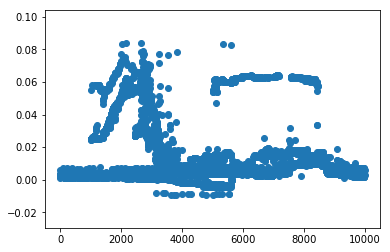

In [257]:
from matplotlib import pyplot as plt
plt.scatter(train.id, train_y)

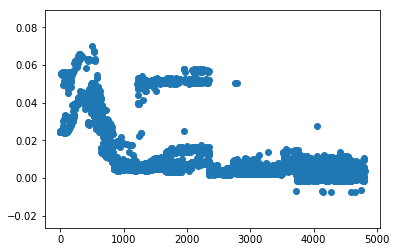

In [159]:
plt.scatter(test_X.index, pred_test_full)

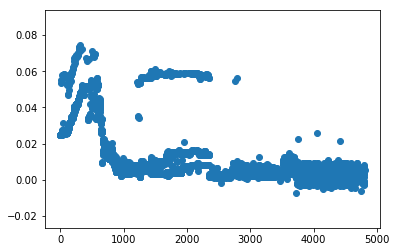

In [276]:
plt.scatter(test_X.index, pred_test_full)

In [149]:
t=pd.read_csv('pred_test_v5_CatBoost(depth6-0.01-0.7).csv')

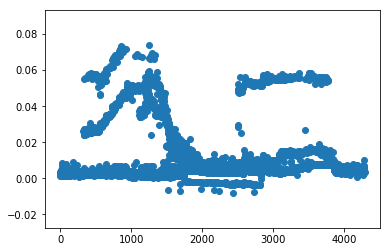

In [256]:
plt.scatter(test_X.id, pred_test_full)

In [289]:
np.max(pred_test_full)

0.077848762

In [259]:
train_y.max()

0.084000000000000005